# Machine Learning And Artificial Intelligence for Prediction of OPC Strength, RAC Strength, RAC Carbonization, RAC Chloride Erosion & RAC Sulfate Corrosion

### Library Imports

In [11]:
import sys,os
import sklearn
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn import preprocessing

In [12]:
import xgboost as xgb
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")

### Datasheet Imports

In [13]:
#detailed_rac = pd.read_csv("Materials 1645501 DataSheetold.csv")
carbonization_rac = pd.read_csv("Carbonization_Experimental_data.csv")
chloride_ion_erosion_rac = pd.read_csv("Chloride_Ion_Erosion_Experimental_data.csv")
sulfate_corrosion_rac = pd.read_csv("Sulfate_Corrosion_Experimental_data.csv")
cs = pd.read_csv("Concrete_Data.csv")

In [14]:
detailed_rac = pd.read_csv("Materials 1771857 Datasheet.csv")

Text(0.5, 0, 'Durability Factor K')

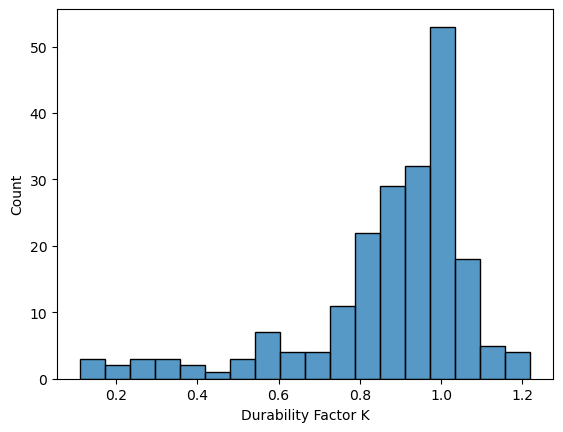

In [15]:
sns.histplot(data=sulfate_corrosion_rac['K'])
plt.xlabel('Durability Factor K')

         Sulfate Corrosion Categorical To Continuous Conversion Done In Excel for Machine Learning

(Cation Type)
Na Class Variable >> 1
Mg Class Variable >> 2

(Immersion Type)
Full Immersion >> 1
Dry-Wet Cycle >> 2

### Statistical Visualization

##### Descriptive Statistics to see the distribution of various parameters

In [16]:
description = detailed_rac.describe()
description_rounded = description.round(2)
cs.to_csv(r".\Tables\rac_describe.csv")

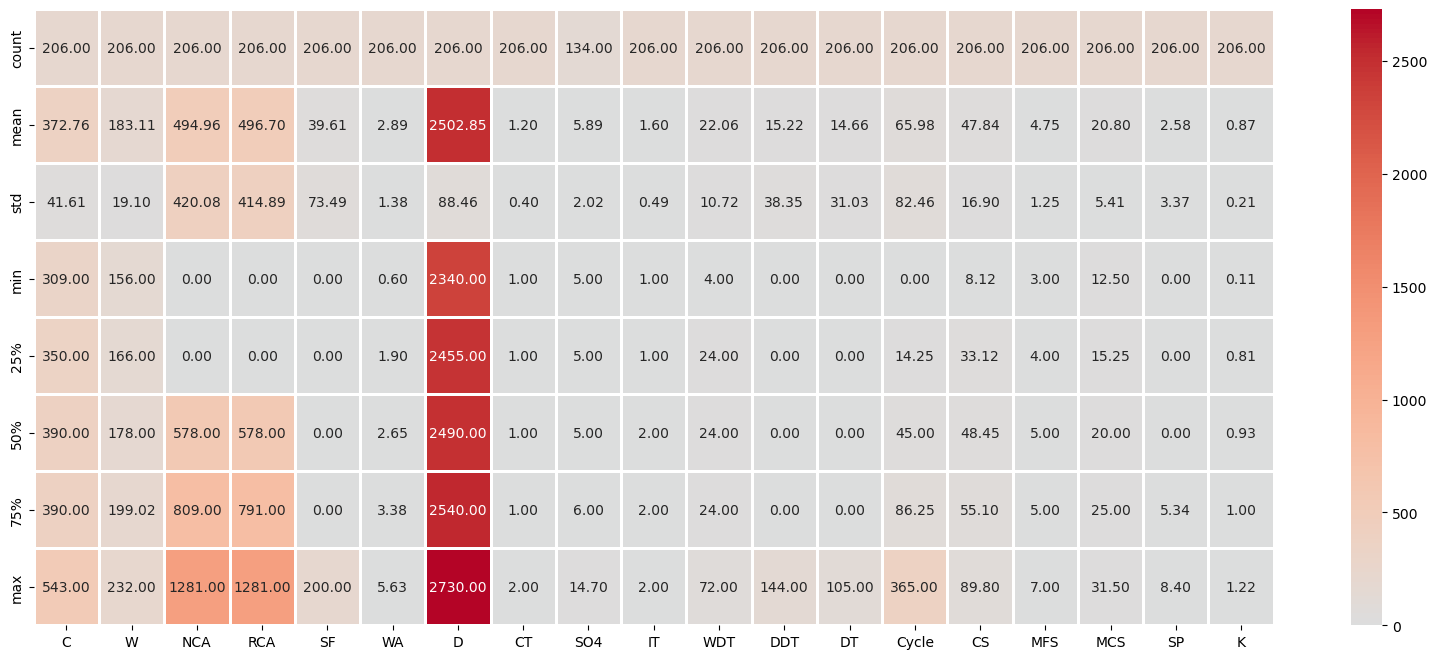

In [17]:
data = sulfate_corrosion_rac.describe()
plt.figure(figsize = (20,8))
sns.heatmap(data, center = 0.5, cmap = 'coolwarm', annot= True, xticklabels = data.columns, yticklabels = data.index,
            cbar= True, linewidths= 1,fmt=".2f")   # Da Heatmap
plt.show()

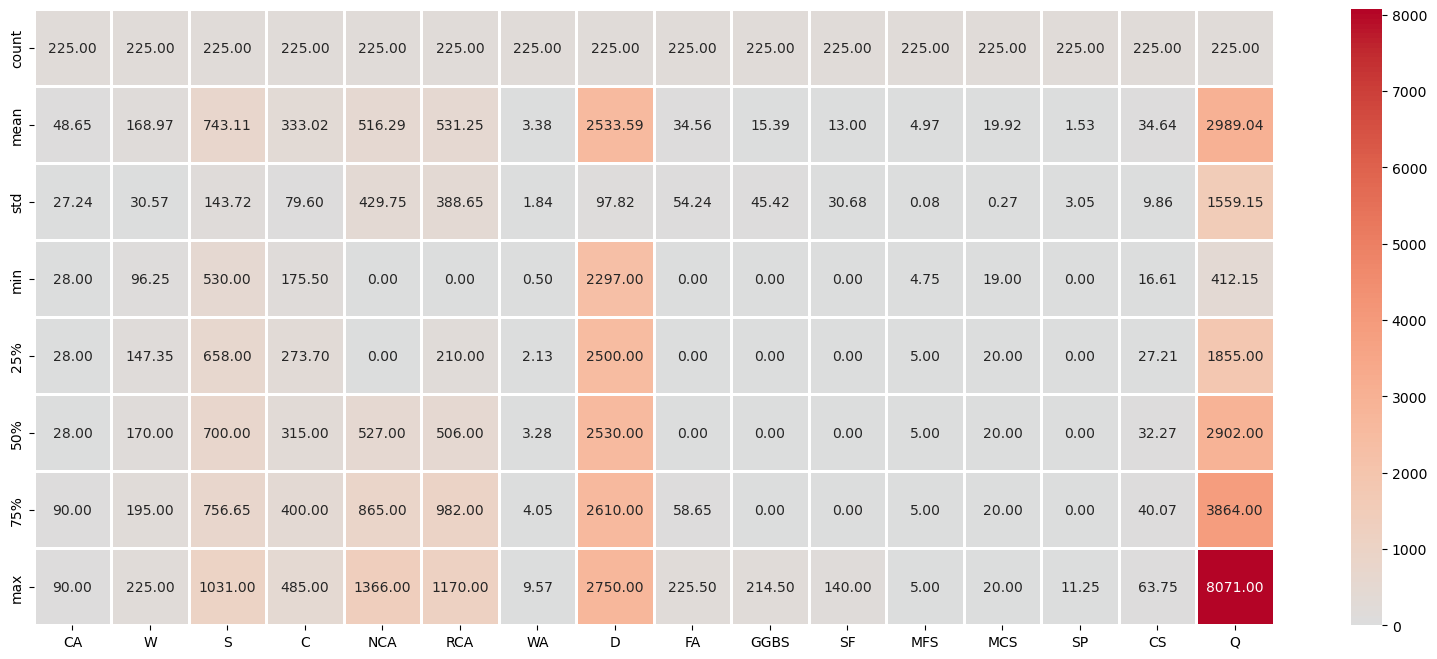

In [18]:
data = chloride_ion_erosion_rac.describe()
plt.figure(figsize = (20,8))
sns.heatmap(data, center = 0.5, cmap = 'coolwarm', annot= True, xticklabels = data.columns, yticklabels = data.index,
            cbar= True, linewidths= 1,fmt=".2f")   # Da Heatmap
plt.show()

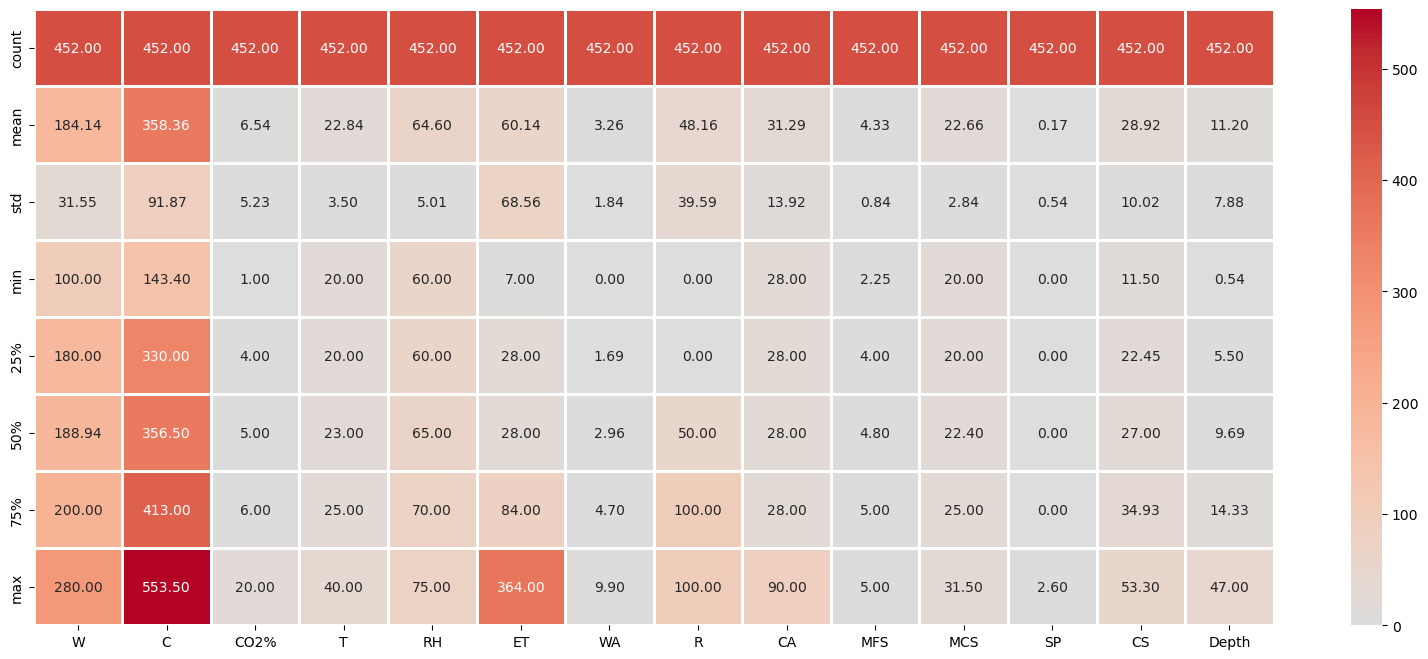

In [19]:
data = carbonization_rac.describe()
plt.figure(figsize = (20,8))
sns.heatmap(data, center = 0.5, cmap = 'coolwarm', annot= True, xticklabels = data.columns, yticklabels = data.index,
            cbar= True, linewidths= 1,fmt=".2f")   # Da Heatmap
plt.show()

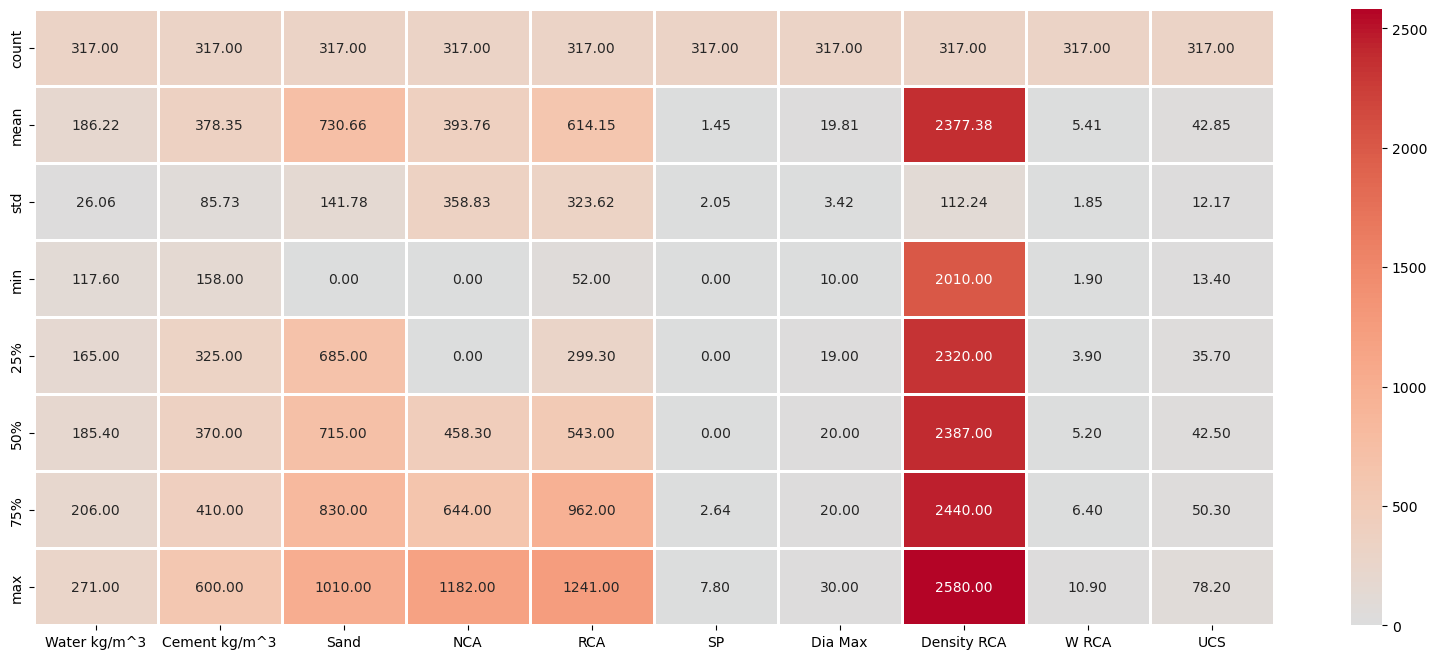

In [20]:
data = detailed_rac.describe()
plt.figure(figsize = (20,8))
sns.heatmap(data, center = 0.5, cmap = 'coolwarm', annot= True, xticklabels = data.columns, yticklabels = data.index,
            cbar= True, linewidths= 1,fmt=".2f")   # Da Heatmap
plt.show()

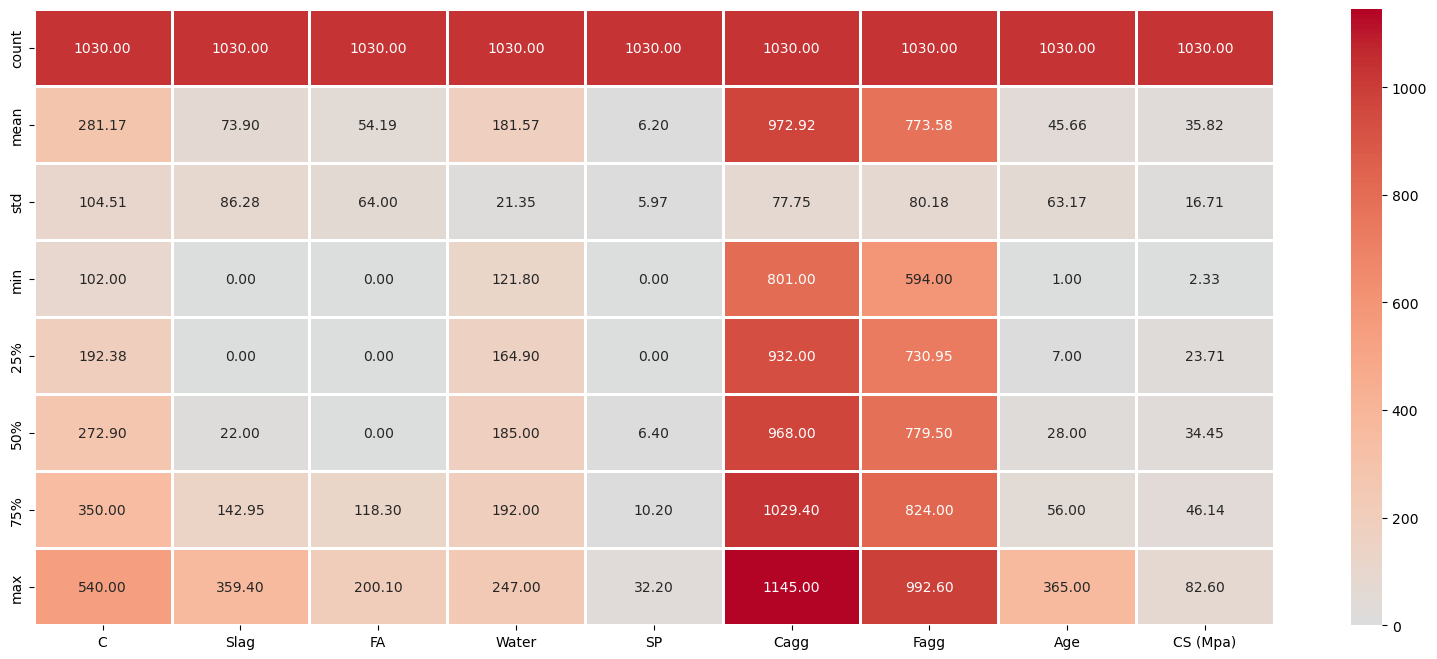

In [21]:
data = cs.describe()
plt.figure(figsize = (20,8))
sns.heatmap(data, center = 0.5, cmap = 'coolwarm', annot= True, xticklabels = data.columns, yticklabels = data.index,
            cbar= True, linewidths= 1,fmt=".2f")   # Da Heatmap
plt.show()

##### Printing the first few records to see the data has been imported correctly

In [22]:
sulfate_corrosion_rac.head(5)

C      W    NCA    RCA   SF   WA       D  CT  SO4  IT  WDT  DDT  DT  \
0  350  176.0  791.0    0.0  140  1.3  2580.0   1  5.0   1   24    0   0   
1  350  176.0  791.0    0.0  140  1.3  2580.0   1  5.0   1   24    0   0   
2  350  176.0  791.0    0.0  140  1.3  2580.0   1  5.0   1   24    0   0   
3  350  176.0  791.0    0.0  140  1.3  2580.0   1  5.0   1   24    0   0   
4  350  176.0    0.0  791.0  140  2.5  2540.0   1  5.0   1   24    0   0   

   Cycle     CS  MFS   MCS   SP     K  
0      0  48.18  3.0  15.0  7.0  1.00  
1     90  48.18  3.0  15.0  7.0  0.93  
2    180  48.18  3.0  15.0  7.0  0.83  
3    360  48.18  3.0  15.0  7.0  0.76  
4      0  51.43  3.0  15.0  7.0  1.00

In [23]:
chloride_ion_erosion_rac.head(5)

CA      W      S      C     NCA     RCA    WA     D     FA  GGBS   SF  MFS  \
0  28  225.0  642.0  410.0  1048.0     0.0  1.11  2620    0.0   0.0  0.0  5.0   
1  28  225.0  642.0  410.0   524.0   506.0  3.54  2520    0.0   0.0  0.0  5.0   
2  28  225.0  642.0  410.0     0.0  1017.0  5.96  2410    0.0   0.0  0.0  5.0   
3  28  225.0  611.0  307.5  1048.0     0.0  1.11  2620  102.5   0.0  0.0  5.0   
4  28  225.0  611.0  307.5   524.0   506.0  3.54  2520  102.5   0.0  0.0  5.0   

   MCS   SP     CS       Q  
0   20  0.0  35.09  6287.0  
1   20  0.0  30.69  6715.0  
2   20  0.0  27.51  6910.0  
3   20  0.0  31.48  4204.0  
4   20  0.0  30.11  4710.0

In [24]:
carbonization_rac.head(5)

W      C  CO2%   T  RH  ET    WA      R  CA  MFS   MCS   SP     CS  \
0  170.0  425.0  10.0  40  70  28  0.94    0.0  28  5.0  20.0  0.0  38.48   
1  170.0  425.0  10.0  40  70  28  3.96  100.0  28  5.0  20.0  0.0  38.48   
2  175.0  318.0  10.0  40  70  28  0.94    0.0  28  5.0  20.0  0.0  38.48   
3  175.0  318.0  10.0  40  70  28  4.38  100.0  28  5.0  20.0  0.0  53.30   
4  175.0  318.0  10.0  40  70  28  3.30  100.0  28  5.0  20.0  0.0  38.48   

   Depth  
0   1.63  
1   3.08  
2   8.66  
3  10.28  
4  10.16

In [25]:
detailed_rac

Ref  Water kg/m^3  Cement kg/m^3   Sand    NCA     RCA    SP  Dia Max  \
0     [1]         165.0            370  650.0  850.5   364.5  2.22       20   
1     NaN         165.0            370  650.0  607.5   607.5  2.22       20   
2     NaN         165.0            370  650.0    0.0  1215.0  2.22       20   
3     NaN         165.0            460  575.0  850.5   364.5  2.22       20   
4     NaN         165.0            460  575.0  607.5   607.5  2.22       20   
..    ...           ...            ...    ...    ...     ...   ...      ...   
312   NaN         190.4            280  873.0    0.0   962.0  0.00       22   
313   NaN         157.5            350  858.0    0.0  1016.0  3.50       22   
314  [33]         179.0            275  878.0  735.0   184.0  0.00       19   
315   NaN         179.0            275  849.0  455.0   455.0  0.00       19   
316   NaN         179.0            275  868.0    0.0   830.0  0.00       19   

     Density RCA  W RCA   UCS  
0           2400    4.9  50.6  
1           2400    4.9  50.8  
2           2400    4.9  50.2  
3           2400    4.9  60.8  
4           2400    4.9  61.2  
..           ...    ...   ...  
312         2458    5.8  39.7  
313         2464    3.9  66.5  
314         2320    5.3  49.3  
315         2320    5.3  47.5  
316         2320    5.3  53.7  

[317 rows x 11 columns]

In [26]:
#detailed_rac.drop(columns=['Ref','Flexural Strength (Mpa)'],inplace=True)

In [27]:
detailed_rac.drop(columns=['Ref'],inplace=True)

In [28]:
detailed_rac.head(5)

Water kg/m^3  Cement kg/m^3   Sand    NCA     RCA    SP  Dia Max  \
0         165.0            370  650.0  850.5   364.5  2.22       20   
1         165.0            370  650.0  607.5   607.5  2.22       20   
2         165.0            370  650.0    0.0  1215.0  2.22       20   
3         165.0            460  575.0  850.5   364.5  2.22       20   
4         165.0            460  575.0  607.5   607.5  2.22       20   

   Density RCA  W RCA   UCS  
0         2400    4.9  50.6  
1         2400    4.9  50.8  
2         2400    4.9  50.2  
3         2400    4.9  60.8  
4         2400    4.9  61.2

In [29]:
cs.head(5)

C   Slag   FA  Water   SP    Cagg   Fagg  Age  CS (Mpa)
0  540.0    0.0  0.0  162.0  2.5  1040.0  676.0   28     79.99
1  540.0    0.0  0.0  162.0  2.5  1055.0  676.0   28     61.89
2  332.5  142.5  0.0  228.0  0.0   932.0  594.0  270     40.27
3  332.5  142.5  0.0  228.0  0.0   932.0  594.0  365     41.05
4  198.6  132.4  0.0  192.0  0.0   978.4  825.5  360     44.30

### Data Visualisation

#### Pairplotting is used to see multi-collinearity and reduncancy of features if any. In our workflow we removed majority of the redundant features beforehand before importing the datasets.

In [30]:
#sns.pairplot(cs,kind='reg',plot_kws={'line_kws':{'color':'red'}})

In [31]:
#sns.pairplot(detailed_rac,kind='reg',plot_kws={'line_kws':{'color':'red'}})

In [32]:
#sns.pairplot(carbonization_rac,kind='reg',plot_kws={'line_kws':{'color':'red'}})

In [33]:
#sns.pairplot(chloride_ion_erosion_rac,kind='reg',plot_kws={'line_kws':{'color':'red'}})

In [34]:
#sns.pairplot(sulfate_corrosion_rac,kind='reg',plot_kws={'line_kws':{'color':'red'}})

In [35]:
import plotly_express as px

### Pearson Correlation Matrix For Feature Selection and Feature Importance Visualisation

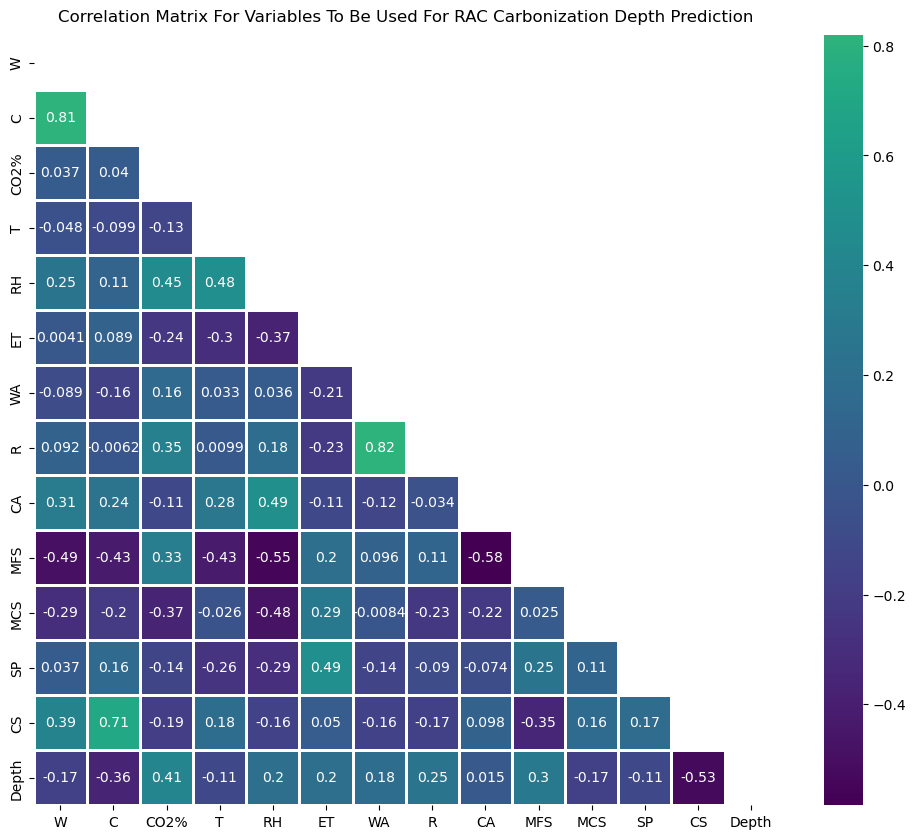

In [36]:
corr = carbonization_rac.corr() # correlation matrix
corr.to_csv('./graphs_data/corr_c.csv', index=False)
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (12,10))
sns.heatmap(lower_triangle, center = 0.5, cmap = 'viridis', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= True, linewidths= 1, mask = mask)   # Da Heatmap
plt.title('Correlation Matrix For Variables To Be Used For RAC Carbonization Depth Prediction',pad=10)
plt.show()

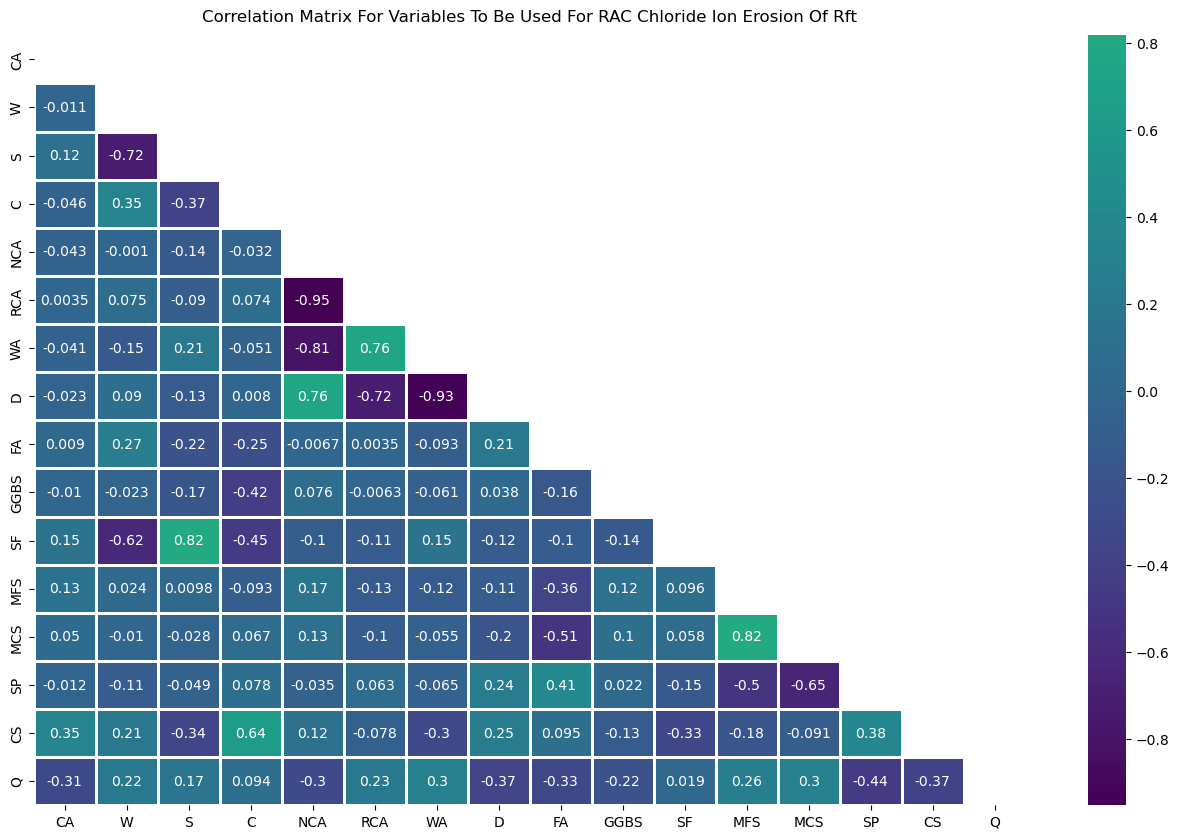

In [37]:
corr = chloride_ion_erosion_rac.corr() # correlation matrix
corr.to_csv('./graphs_data/corr_cl.csv', index=False)
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (16,10))
sns.heatmap(lower_triangle, center = 0.5, cmap = 'viridis', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= True, linewidths= 1, mask = mask)   # Da Heatmap
plt.title('Correlation Matrix For Variables To Be Used For RAC Chloride Ion Erosion Of Rft',pad=10)
plt.show()

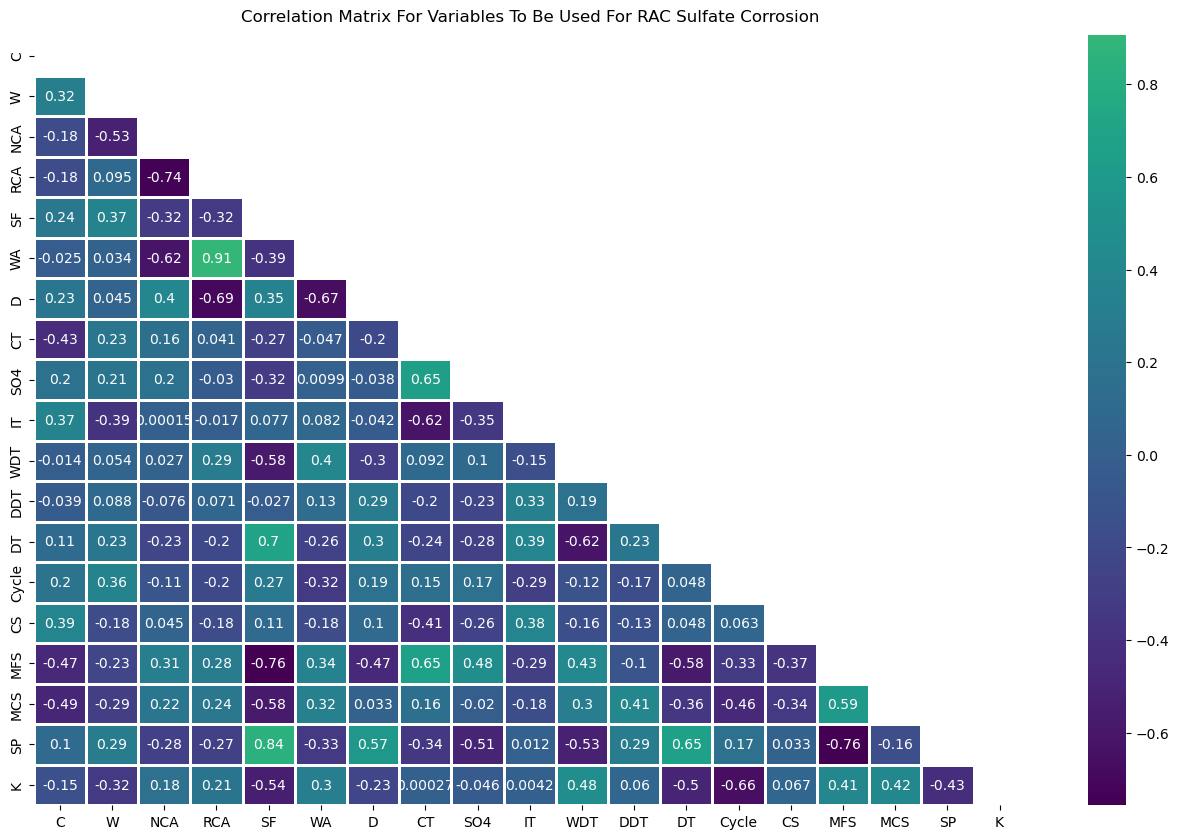

In [38]:
corr = sulfate_corrosion_rac.corr() # correlation matrix
corr.to_csv('./graphs_data/corr_sf.csv', index=False)
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (16,10))
sns.heatmap(lower_triangle, center = 0.5, cmap = 'viridis', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= True, linewidths= 1, mask = mask)   # Da Heatmap
plt.title('Correlation Matrix For Variables To Be Used For RAC Sulfate Corrosion',pad=10)
plt.show()

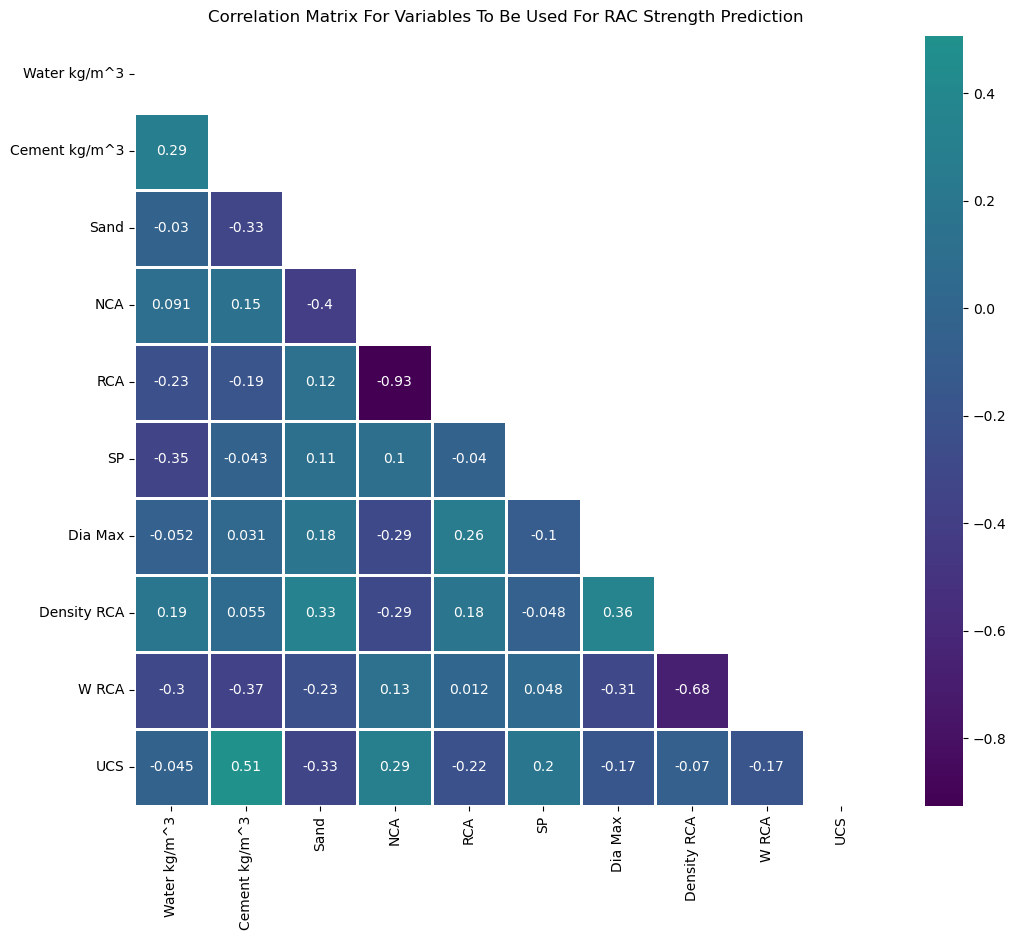

In [39]:
corr = detailed_rac.corr() # correlation matrix
corr.to_csv('./graphs_data/corr_det.csv', index=False)
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (12,10))
sns.heatmap(lower_triangle, center = 0.5, cmap = 'viridis', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= True, linewidths= 1, mask = mask)   # Da Heatmap
plt.title('Correlation Matrix For Variables To Be Used For RAC Strength Prediction',pad=10)
plt.show()

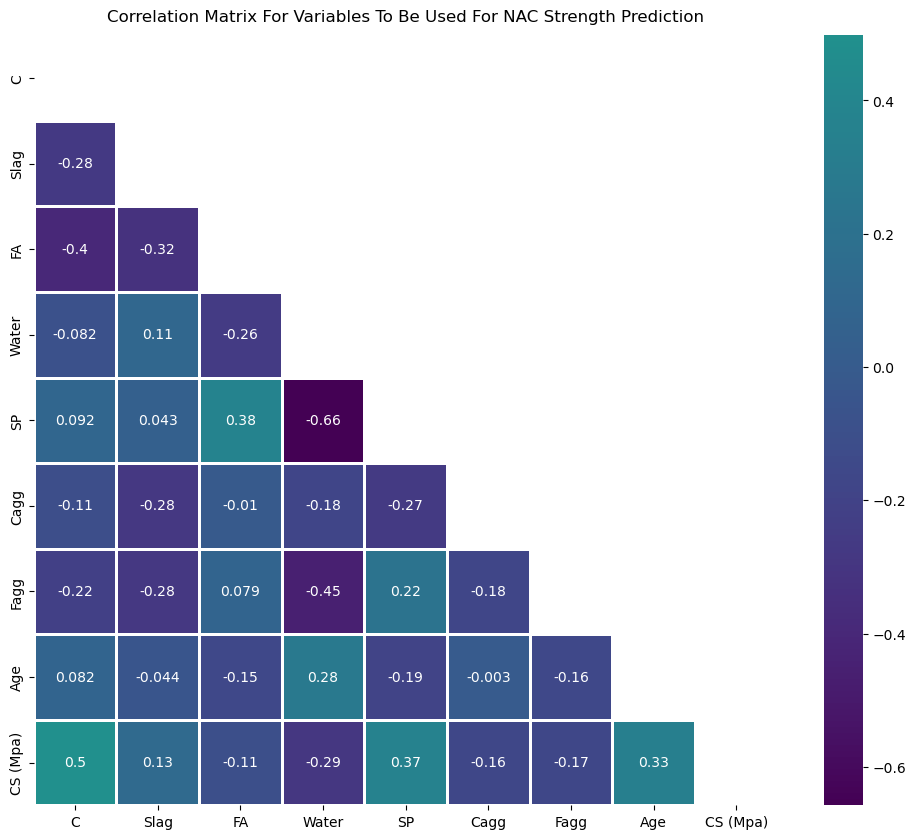

In [40]:
corr = cs.corr() # correlation matrix
corr.to_csv('./graphs_data/corr_cs.csv', index=False)
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (12,10))
sns.heatmap(lower_triangle, center = 0.5, cmap = 'viridis', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= True, linewidths= 1, mask = mask)   # Da Heatmap
plt.title('Correlation Matrix For Variables To Be Used For NAC Strength Prediction',pad=10)
plt.show()

### Data Wrangling And Preprocessing

In [41]:
sulfate_corrosion_rac.shape

(206, 19)

In [42]:
chloride_ion_erosion_rac.shape

(225, 16)

In [43]:
carbonization_rac.shape

(452, 14)

In [44]:
detailed_rac.shape

(317, 10)

In [45]:
cs.shape

(1030, 9)

In [46]:
carbonization_rac.drop_duplicates(inplace=True)
carbonization_rac.dropna(inplace=True)
carbonization_rac.shape

(451, 14)

In [47]:
chloride_ion_erosion_rac.drop_duplicates(inplace=True)
chloride_ion_erosion_rac.dropna(inplace=True)
chloride_ion_erosion_rac.shape

(225, 16)

In [48]:
sulfate_corrosion_rac.drop_duplicates(inplace=True)
sulfate_corrosion_rac.dropna(inplace=True)
sulfate_corrosion_rac.shape

(134, 19)

In [49]:
#Data Preparation
detailed_rac.duplicated().sum()
detailed_rac.drop_duplicates(inplace=True)
detailed_rac.dropna(inplace=True)

In [50]:
detailed_rac.shape

(263, 10)

In [51]:
cs.duplicated().sum()

25

In [52]:
cs.drop_duplicates(inplace=True)
cs.dropna(inplace=True)
cs.shape

(1005, 9)

### Machine Learning Model Imports

In [53]:
#Model Imports
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from xgboost import XGBRFRegressor

### Data Splitting Into Feature & Target Variables

In [54]:
#Data Splits Into Features & Targets
#X_detailed = detailed_rac.drop(columns=['Compressive Strength (Mpa)'])
X_detailed = detailed_rac.drop(columns=['UCS'])
#Y_detailed = detailed_rac[['Compressive Strength (Mpa)']]
Y_detailed = detailed_rac[['UCS']]
X_cs = cs.drop(columns=['CS (Mpa)'])
Y_cs = cs[['CS (Mpa)']]
X_carbonization = carbonization_rac.drop(columns =['Depth'])
Y_carbonization = carbonization_rac[['Depth']]
X_chloride = chloride_ion_erosion_rac.drop(columns =['Q'])
Y_chloride = chloride_ion_erosion_rac[['Q']]
X_sulfate = sulfate_corrosion_rac.drop(columns =['K'])
Y_sulfate = sulfate_corrosion_rac[['K']]


### Data Conversion Into Arrays as Machine Learning Models Take Inputs Only In Form Of Arrays

In [55]:
#Conversion To Arrays For ML Modelling
X_detailed = X_detailed.to_numpy()
Y_detailed = Y_detailed.to_numpy()
X_cs = X_cs.to_numpy()
Y_cs = Y_cs.to_numpy()
X_carbonization = X_carbonization.to_numpy()
Y_carbonization = Y_carbonization.to_numpy()
X_chloride = X_chloride.to_numpy()
Y_chloride = Y_chloride.to_numpy()
X_sulfate = X_sulfate.to_numpy()
Y_sulfate = Y_sulfate.to_numpy()


In [56]:
#Converting Nested Arrays Into Simple List
Y_carbonization = [element for sublist in Y_carbonization for element in sublist]
Y_chloride = [element for sublist in Y_chloride for element in sublist]

In [57]:
#Converting List back into an Array for ML Modelling
Y_carbonization = np.array(Y_carbonization)
Y_chloride = np.array(Y_chloride)

### Data Standardization For Faster Convergence, Reducing Numerical Instabilities, Regularization & Improved Model Performance

In [58]:
#Data Standardization To Remove Numerical Significance
transform_X_detailed = preprocessing.StandardScaler()
transform_X_cs = preprocessing.StandardScaler()
transform_X_carbonization = preprocessing.StandardScaler()
transform_X_chloride = preprocessing.StandardScaler()
transform_X_sulfate = preprocessing.StandardScaler()
#Separate StandardScaler objects are used so that each dataset is scaled according to its own mean and distribution
X_detailed = transform_X_detailed.fit_transform(X_detailed)
X_cs = transform_X_cs.fit_transform(X_cs)
X_carbonization = transform_X_carbonization.fit_transform(X_carbonization)
X_chloride = transform_X_chloride.fit_transform(X_chloride)
X_sulfate = transform_X_sulfate.fit_transform(X_sulfate)

### Conversion Of Target Variable From 2D Array to 1D Array For Prediction Process

In [59]:
Y_detailed = Y_detailed.ravel()
Y_carbonization.ravel()
Y_chloride.ravel()
Y_sulfate = Y_sulfate.ravel()
Y_cs = Y_cs.ravel()

### Data Pipeline Creation

In [60]:
#Train-Test-Split
X_train_det, X_test_det, Y_train_det, Y_test_det = train_test_split(X_detailed,Y_detailed,test_size=0.1,random_state=32)
X_train_cs, X_test_cs, Y_train_cs, Y_test_cs = train_test_split(X_cs,Y_cs,test_size=0.1,random_state=1)
X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(X_carbonization,Y_carbonization,test_size=0.1,random_state=1)
X_train_cl, X_test_cl, Y_train_cl, Y_test_cl = train_test_split(X_chloride,Y_chloride,test_size=0.1,random_state=1)
X_train_sf, X_test_sf, Y_train_sf, Y_test_sf = train_test_split(X_sulfate,Y_sulfate,test_size=0.1,random_state=1)

### Defining Model Functions, Hypertuning Of Parameters To Prevent Overfitting & Cross-Validation For Realistic Accuracy Scoring. These Functions Will Create a Grid Of All Possible Parameters and Select The Best Possible Parameters For Prediction Purposes.

In [61]:
#Support Vector Machine Function Definition
def svm_training(X_train,Y_train):
    parameters = {'kernel':['linear', 'rbf','poly','rbf', 'sigmoid'],
                  'gamma': [0.1,1,10],
                  'C' :[1,10,100]
                  }
    svm = SVR()
    svm_cv = GridSearchCV(svm,parameters,cv=5)
    svm_cv.fit(X=X_train,y=Y_train)
    print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
    print("accuracy :",svm_cv.best_score_)

In [62]:
#Decision Tree Regressor Function Definition
def decision_regressor(X_train,Y_train):
    parameters = {'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [100, 500, 1000],
    'criterion': ['squared_error']}
    dtr = DecisionTreeRegressor()
    dtr_cv = GridSearchCV(dtr,parameters,cv=3)
    dtr_cv.fit(X=X_train,y=Y_train)
    print("tuned hyperparameters :(best parameters) ",dtr_cv.best_params_)
    print("accuracy :",dtr_cv.best_score_)

In [63]:
'''
decision_regressor(X_train_det,Y_train_det)
decision_regressor(X_train_cs,Y_train_cs)
decision_regressor(X_train_c,Y_train_c)
decision_regressor(X_train_cl,Y_train_cl)
decision_regressor(X_train_sf,Y_train_sf)
'''

'\ndecision_regressor(X_train_det,Y_train_det)\ndecision_regressor(X_train_cs,Y_train_cs)\ndecision_regressor(X_train_c,Y_train_c)\ndecision_regressor(X_train_cl,Y_train_cl)\ndecision_regressor(X_train_sf,Y_train_sf)\n'

In [64]:
#Random Forest Regressor Function Definition
def rf_regressor(X_train,Y_train):
    parameters = {'n_estimators': [100, 200,240, 300, 500],
    'max_depth': [3, 5, 7,9],
    'min_samples_split': [1,2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_samples': [0.5,0.7,0.9],
    'bootstrap': [True, False],
    }
    rfr = RandomForestRegressor()
    rfr_cv = GridSearchCV(rfr,parameters,cv=3)
    rfr_cv.fit(X=X_train,y=Y_train)
    print("tuned hyperparameters :(best parameters) ",rfr_cv.best_params_)
    print("accuracy :",rfr_cv.best_score_)

In [65]:
'''
rf_regressor(X_train_det,Y_train_det)
rf_regressor(X_train_cs,Y_train_cs)
rf_regressor(X_train_c,Y_train_c)
rf_regressor(X_train_cl,Y_train_cl)
rf_regressor(X_train_sf,Y_train_sf)
'''

'\nrf_regressor(X_train_det,Y_train_det)\nrf_regressor(X_train_cs,Y_train_cs)\nrf_regressor(X_train_c,Y_train_c)\nrf_regressor(X_train_cl,Y_train_cl)\nrf_regressor(X_train_sf,Y_train_sf)\n'

In [66]:
#Adaboost Regressor Function Definition
def ada_regressor(X_train,Y_train):
    parameters = {'n_estimators': [50,100,500,1000],
    'learning_rate': [0.01,0.1,1,10],
    'loss': ['linear', 'square', 'exponential']}
    adaR = AdaBoostRegressor()
    adaR_cv = GridSearchCV(adaR,parameters,cv=3)
    adaR_cv.fit(X=X_train,y=Y_train)
    print("tuned hyperparameters :(best parameters) ",adaR_cv.best_params_)
    print("accuracy :",adaR_cv.best_score_)

In [67]:
'''
ada_regressor(X_train_det,Y_train_det)
ada_regressor(X_train_cs,Y_train_cs)
ada_regressor(X_train_c,Y_train_c)
ada_regressor(X_train_cl,Y_train_cl)
ada_regressor(X_train_sf,Y_train_sf)
'''

'\nada_regressor(X_train_det,Y_train_det)\nada_regressor(X_train_cs,Y_train_cs)\nada_regressor(X_train_c,Y_train_c)\nada_regressor(X_train_cl,Y_train_cl)\nada_regressor(X_train_sf,Y_train_sf)\n'

In [68]:
#Gradient Boosted Decision Trees Function Definition
def GBDT(X_train,Y_train):
    parameters = {'n_estimators': [50,100,150,200,231,500],
    'learning_rate': [0.05,0.075,0.1,0.15,0.2,1,10],
    'loss': ['squared_error'],
    'criterion':['friedman_mse'],
    'max_depth':[1,3,4,5],
    'subsample':[0.8,0.9],
    'min_samples_split' :[],
    }
    gbtree = GradientBoostingRegressor()
    gbtree_cv = GridSearchCV(gbtree,parameters,cv=3)
    gbtree_cv.fit(X=X_train,y=Y_train)
    print("tuned hyperparameters :(best parameters) ",gbtree_cv.best_params_)
    print("accuracy :",gbtree_cv.best_score_)

In [69]:
'''
GBDT(X_train_det,Y_train_det)
GBDT(X_train_cs,Y_train_cs)
GBDT(X_train_c,Y_train_c)
GBDT(X_train_cl,Y_train_cl)
GBDT(X_train_sf,Y_train_sf)
'''

'\nGBDT(X_train_det,Y_train_det)\nGBDT(X_train_cs,Y_train_cs)\nGBDT(X_train_c,Y_train_c)\nGBDT(X_train_cl,Y_train_cl)\nGBDT(X_train_sf,Y_train_sf)\n'

In [70]:
#Historical Gradient Boosting Regressor Function Definition
def histR(X_train,Y_train):
    parameters = {
    'max_iter': [50, 100, 200,500],
    'learning_rate': [0.01, 0.1,0.2, 1.0],
    'loss': ['absolute_error', 'squared_error'],
    'min_samples_leaf':[5,10,15,20],
    'max_depth':[1,3,4,5]}
    histR = HistGradientBoostingRegressor()
    histR_cv = GridSearchCV(histR,parameters,cv=3)
    histR_cv.fit(X=X_train,y=Y_train)
    print("tuned hyperparameters :(best parameters) ",histR_cv.best_params_)
    print("accuracy :",histR_cv.best_score_)

In [71]:
'''
histR(X_train_det,Y_train_det)
histR(X_train_cs,Y_train_cs)
histR(X_train_c,Y_train_c)
histR(X_train_cl,Y_train_cl)
histR(X_train_sf,Y_train_sf)
'''

'\nhistR(X_train_det,Y_train_det)\nhistR(X_train_cs,Y_train_cs)\nhistR(X_train_c,Y_train_c)\nhistR(X_train_cl,Y_train_cl)\nhistR(X_train_sf,Y_train_sf)\n'

### Bayes Optimization For Selected XGBoost Model For Predictions

#### Bayes Optimization For RAC Strength Prediction

In [72]:
'''
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
from sklearn import metrics

# Create hyperparameter space to search over
space = {'max_depth': hp.choice('max_depth', np.arange(3, 15, 1, dtype = int)),
        'n_estimators': hp.choice('n_estimators', np.arange(50, 300, 10, dtype = int)),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),
        'min_child_weight': hp.choice('min_child_weight', np.arange(0, 10, 1, dtype = int)),
        'subsample': hp.quniform('subsample', 0.5, 1.0, 0.1),
        'learning_rate': hp.quniform('learning_rate', 0.1, 0.3, 0.1),
         'gamma': hp.choice('gamma', np.arange(0, 20, 0.5, dtype = float)),
         'reg_alpha': hp.choice('reg_alpha', np.arange(0, 20, 0.5, dtype = float)),
         'reg_lambda': hp.choice('reg_lambda', np.arange(0, 20, 0.5, dtype = float)),
         
        'objective': 'reg:squarederror',
        
        'eval_metric': 'rmse'}

def score(params):
    model = XGBRegressor(**params)
    
    model.fit(X_train_det, Y_train_det, 
              eval_set = [(X_train_det, Y_train_det), (X_test_det, Y_test_det)],
              verbose = False, 
              early_stopping_rounds = 10)
    
    y_pred = model.predict(X_test_det)
    score = np.sqrt(metrics.mean_squared_error(Y_test_det, y_pred))
    print(score)
    return {'loss': score, 'status': STATUS_OK}    
    
def optimize(trials, space):
    
    best = fmin(score, space, algo = tpe.suggest, max_evals = 1000)
    return best

trials = Trials()
best_params = optimize(trials, space)
'''

"\nfrom hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval\nfrom sklearn import metrics\n\n# Create hyperparameter space to search over\nspace = {'max_depth': hp.choice('max_depth', np.arange(3, 15, 1, dtype = int)),\n        'n_estimators': hp.choice('n_estimators', np.arange(50, 300, 10, dtype = int)),\n        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),\n        'min_child_weight': hp.choice('min_child_weight', np.arange(0, 10, 1, dtype = int)),\n        'subsample': hp.quniform('subsample', 0.5, 1.0, 0.1),\n        'learning_rate': hp.quniform('learning_rate', 0.1, 0.3, 0.1),\n         'gamma': hp.choice('gamma', np.arange(0, 20, 0.5, dtype = float)),\n         'reg_alpha': hp.choice('reg_alpha', np.arange(0, 20, 0.5, dtype = float)),\n         'reg_lambda': hp.choice('reg_lambda', np.arange(0, 20, 0.5, dtype = float)),\n         \n        'objective': 'reg:squarederror',\n        \n        'eval_metric': 'rmse'}\n\ndef score(params):\n    model = 

In [73]:
#space_eval(space, best_params)

In [74]:
model_opt_det = XGBRegressor(max_depth = 9, 
                         n_estimators = 250, 
                         learning_rate = 0.30000000000000004, 
                         min_child_weight = 9, 
                         subsample = 0.8,
                         colsample_bytree = 0.9, 
                         gamma = 0.5, 
                         reg_alpha = 5.0, 
                         reg_lambda = 14.5, 
                         objective = 'reg:squarederror')

# Fit with hp datasets
model_opt_det.fit(X_train_det, Y_train_det, 
              eval_set = [(X_train_det, Y_train_det), (X_test_det, Y_test_det)], 
              eval_metric = 'rmse', 
              verbose = True, 
              early_stopping_rounds = 10)

[0]	validation_0-rmse:10.95466	validation_1-rmse:11.37568
[1]	validation_0-rmse:10.06148	validation_1-rmse:10.30902
[2]	validation_0-rmse:9.41908	validation_1-rmse:9.74921
[3]	validation_0-rmse:8.75670	validation_1-rmse:9.38575
[4]	validation_0-rmse:8.08168	validation_1-rmse:8.81298
[5]	validation_0-rmse:7.59674	validation_1-rmse:8.50798
[6]	validation_0-rmse:7.14240	validation_1-rmse:8.10788
[7]	validation_0-rmse:6.80288	validation_1-rmse:7.81588
[8]	validation_0-rmse:6.38523	validation_1-rmse:7.26545
[9]	validation_0-rmse:6.12006	validation_1-rmse:7.16128
[10]	validation_0-rmse:5.82771	validation_1-rmse:7.26615
[11]	validation_0-rmse:5.54510	validation_1-rmse:6.90872
[12]	validation_0-rmse:5.33947	validation_1-rmse:6.86343
[13]	validation_0-rmse:5.13682	validation_1-rmse:6.71553
[14]	validation_0-rmse:4.96493	validation_1-rmse:6.65679
[15]	validation_0-rmse:4.81145	validation_1-rmse:6.61816
[16]	validation_0-rmse:4.61813	validation_1-rmse:6.50670
[17]	validation_0-rmse:4.43233	valida

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.5, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.30000000000000004,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=9, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [75]:
'''
model_opt_det = XGBRegressor(max_depth = 9, 
                         n_estimators = 250, 
                         learning_rate = 0.30000000000000004, 
                         min_child_weight = 9, 
                         subsample = 0.8,
                         colsample_bytree = 0.9, 
                         gamma = 0.5, 
                         reg_alpha = 5.0, 
                         reg_lambda = 14.5, 
                         objective = 'reg:squarederror')

# Fit with hp datasets
model_opt_det.fit(X_train_det, Y_train_det, 
              eval_set = [(X_train_det, Y_train_det), (X_test_det, Y_test_det)], 
              eval_metric = 'rmse', 
              verbose = True, 
              early_stopping_rounds = 10)
'''

"\nmodel_opt_det = XGBRegressor(max_depth = 9, \n                         n_estimators = 250, \n                         learning_rate = 0.30000000000000004, \n                         min_child_weight = 9, \n                         subsample = 0.8,\n                         colsample_bytree = 0.9, \n                         gamma = 0.5, \n                         reg_alpha = 5.0, \n                         reg_lambda = 14.5, \n                         objective = 'reg:squarederror')\n\n# Fit with hp datasets\nmodel_opt_det.fit(X_train_det, Y_train_det, \n              eval_set = [(X_train_det, Y_train_det), (X_test_det, Y_test_det)], \n              eval_metric = 'rmse', \n              verbose = True, \n              early_stopping_rounds = 10)\n"

In [76]:
y_pred_1_opt = model_opt_det.predict(X_test_det)

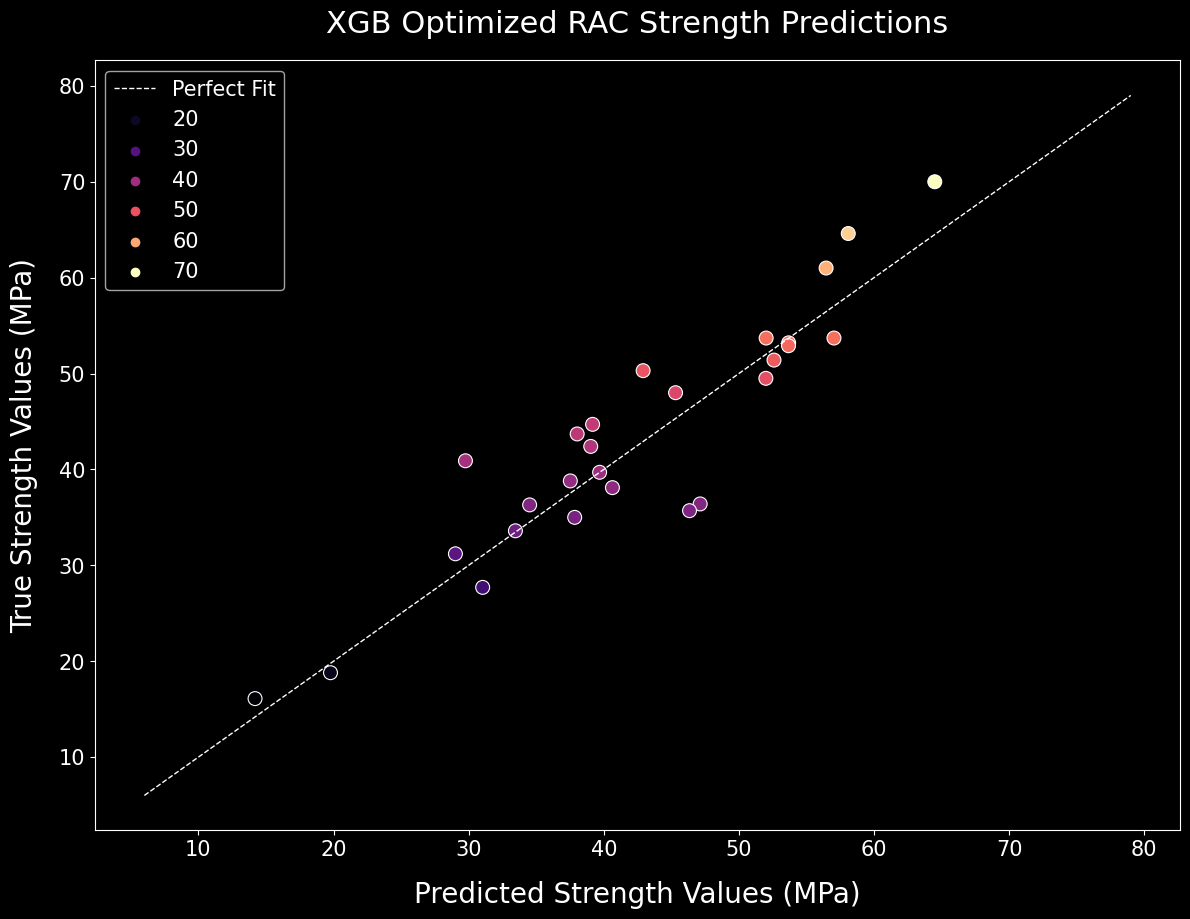

In [77]:
plt.style.use('dark_background')
y_line = np.arange(int(Y_test_det.min()) - 10, int(Y_test_det.max()) + 10)
plt.figure(figsize = (14, 10))
ax = plt.axes()
plt.plot(y_line, y_line, 'k--', lw = 1, label = 'Perfect Fit',color='w')
sns.scatterplot(x=y_pred_1_opt, y=Y_test_det, s = 100,hue=Y_test_det,palette='magma',markers=True)
plt.xlabel('Predicted Strength Values (MPa)', fontsize = 20, labelpad = 15)
plt.ylabel('True Strength Values (MPa)', fontsize = 20, labelpad = 15)
plt.title('XGB Optimized RAC Strength Predictions', fontsize = 22, c = 'w', pad = 20)
plt.legend(fontsize = 15)
plt.tick_params(labelsize = 15)
plt.show()

In [78]:
residuals_1_opt = Y_test_det - y_pred_1_opt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


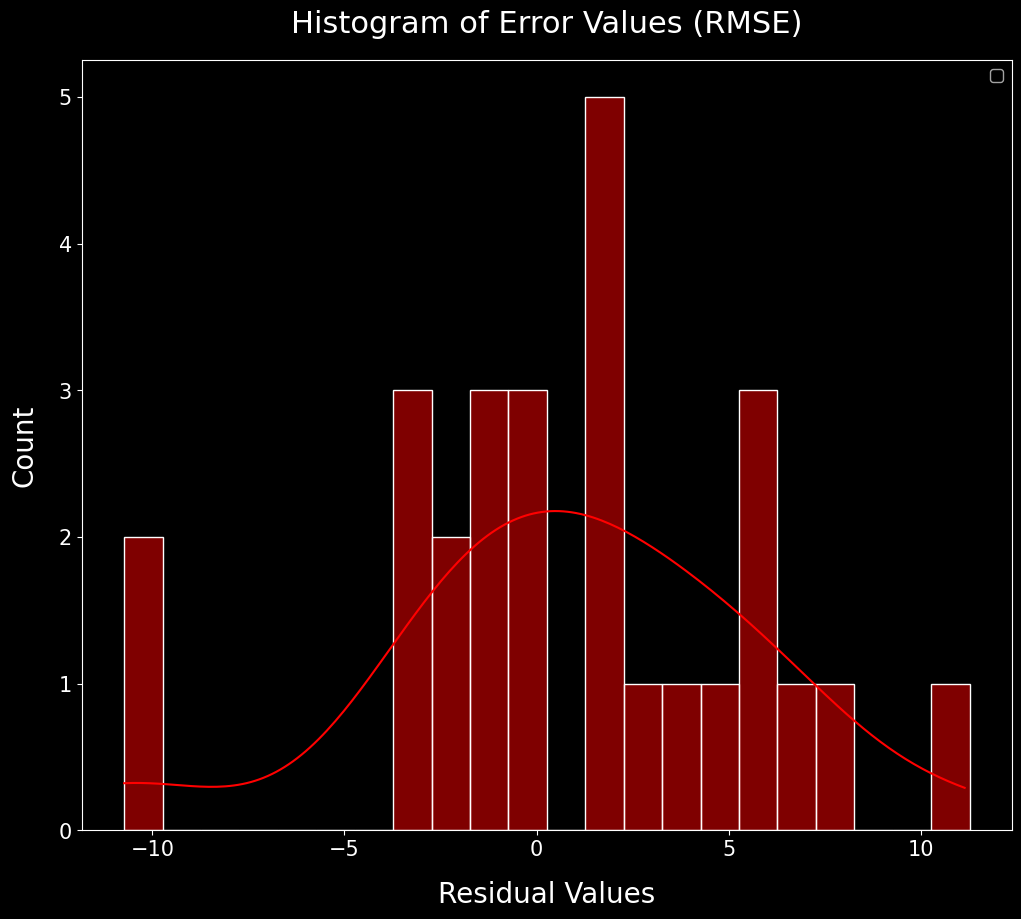

In [79]:
plt.figure(figsize = (12, 10))
ax = plt.axes()
sns.histplot(residuals_1_opt, bins = 5, alpha = 0.5,kde=True,binwidth=1,color = 'r')
plt.xlabel('Residual Values', fontsize = 20, labelpad = 15)
plt.ylabel('Count', fontsize = 20, labelpad = 15)
plt.title('Histogram of Error Values (RMSE)', fontsize = 22, c = 'w', pad = 20)
plt.tick_params(labelsize = 15)
plt.legend(fontsize = 12)
plt.style.use('bmh')
plt.show()

In [80]:
from sklearn.metrics import r2_score
yhat=model_opt_det.predict(X_train_det)
r_squared = r2_score(Y_train_det,yhat)
print(r_squared)
yhat=model_opt_det.predict(X_test_det)
r_squared = r2_score(Y_test_det,yhat)
print(r_squared)

0.9828913060585717
0.8458259920057063


#### Bayes Optimization For NAC Compressive Strength Prediction

In [81]:
'''
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
from sklearn import metrics

# Create hyperparameter space to search over
space = {'max_depth': hp.choice('max_depth', np.arange(3, 15, 1, dtype = int)),
        'n_estimators': hp.choice('n_estimators', np.arange(50, 300, 10, dtype = int)),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),
        'min_child_weight': hp.choice('min_child_weight', np.arange(0, 10, 1, dtype = int)),
        'subsample': hp.quniform('subsample', 0.5, 1.0, 0.1),
        'learning_rate': hp.quniform('learning_rate', 0.1, 0.3, 0.1),
         'gamma': hp.choice('gamma', np.arange(0, 20, 0.5, dtype = float)),
         'reg_alpha': hp.choice('reg_alpha', np.arange(0, 20, 0.5, dtype = float)),
         'reg_lambda': hp.choice('reg_lambda', np.arange(0, 20, 0.5, dtype = float)),
         
        'objective': 'reg:squarederror',
        
        'eval_metric': 'rmse'}

def score(params):
    model = XGBRegressor(**params)
    
    model.fit(X_train_cs, Y_train_cs, 
              eval_set = [(X_train_cs, Y_train_cs), (X_test_cs, Y_test_cs)],
              verbose = False, 
              early_stopping_rounds = 10)
    
    y_pred = model.predict(X_test_cs)
    score = np.sqrt(metrics.mean_squared_error(Y_test_cs, y_pred))
    print(score)
    return {'loss': score, 'status': STATUS_OK}    
    
def optimize(trials, space):
    
    best = fmin(score, space, algo = tpe.suggest, max_evals = 1000)
    return best

trials = Trials()
best_params = optimize(trials, space)
'''

"\nfrom hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval\nfrom sklearn import metrics\n\n# Create hyperparameter space to search over\nspace = {'max_depth': hp.choice('max_depth', np.arange(3, 15, 1, dtype = int)),\n        'n_estimators': hp.choice('n_estimators', np.arange(50, 300, 10, dtype = int)),\n        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),\n        'min_child_weight': hp.choice('min_child_weight', np.arange(0, 10, 1, dtype = int)),\n        'subsample': hp.quniform('subsample', 0.5, 1.0, 0.1),\n        'learning_rate': hp.quniform('learning_rate', 0.1, 0.3, 0.1),\n         'gamma': hp.choice('gamma', np.arange(0, 20, 0.5, dtype = float)),\n         'reg_alpha': hp.choice('reg_alpha', np.arange(0, 20, 0.5, dtype = float)),\n         'reg_lambda': hp.choice('reg_lambda', np.arange(0, 20, 0.5, dtype = float)),\n         \n        'objective': 'reg:squarederror',\n        \n        'eval_metric': 'rmse'}\n\ndef score(params):\n    model = 

In [82]:
#space_eval(space, best_params)

In [83]:
model_opt_cs = XGBRegressor(max_depth = 11, 
                         n_estimators = 250, 
                         learning_rate = 0.1, 
                         min_child_weight = 0, 
                         subsample = 0.7000000000000001,
                         colsample_bytree = 1.0, 
                         gamma = 2.0, 
                         reg_alpha = 0.5, 
                         reg_lambda = 0.0, 
                         objective = 'reg:squarederror')

# Fit with hp datasets
model_opt_cs.fit(X_train_cs, Y_train_cs, 
              eval_set = [(X_train_cs, Y_train_cs), (X_test_cs, Y_test_cs)], 
              eval_metric = 'rmse', 
              verbose = True, 
              early_stopping_rounds = 10)

[0]	validation_0-rmse:14.62616	validation_1-rmse:16.13598
[1]	validation_0-rmse:13.26505	validation_1-rmse:14.92886
[2]	validation_0-rmse:12.02739	validation_1-rmse:13.78095
[3]	validation_0-rmse:10.91115	validation_1-rmse:12.72910
[4]	validation_0-rmse:9.92918	validation_1-rmse:11.83488
[5]	validation_0-rmse:9.01115	validation_1-rmse:11.06509
[6]	validation_0-rmse:8.22720	validation_1-rmse:10.38984
[7]	validation_0-rmse:7.50832	validation_1-rmse:9.85472
[8]	validation_0-rmse:6.83970	validation_1-rmse:9.28400
[9]	validation_0-rmse:6.24671	validation_1-rmse:8.74792
[10]	validation_0-rmse:5.71957	validation_1-rmse:8.28983
[11]	validation_0-rmse:5.23210	validation_1-rmse:7.91854
[12]	validation_0-rmse:4.80312	validation_1-rmse:7.59981
[13]	validation_0-rmse:4.40280	validation_1-rmse:7.24551
[14]	validation_0-rmse:4.04145	validation_1-rmse:6.93997
[15]	validation_0-rmse:3.73246	validation_1-rmse:6.68230
[16]	validation_0-rmse:3.45342	validation_1-rmse:6.45988
[17]	validation_0-rmse:3.19655

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=2.0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=11, max_leaves=None,
             min_child_weight=0, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [84]:
y_pred_1_opt = model_opt_cs.predict(X_test_cs)

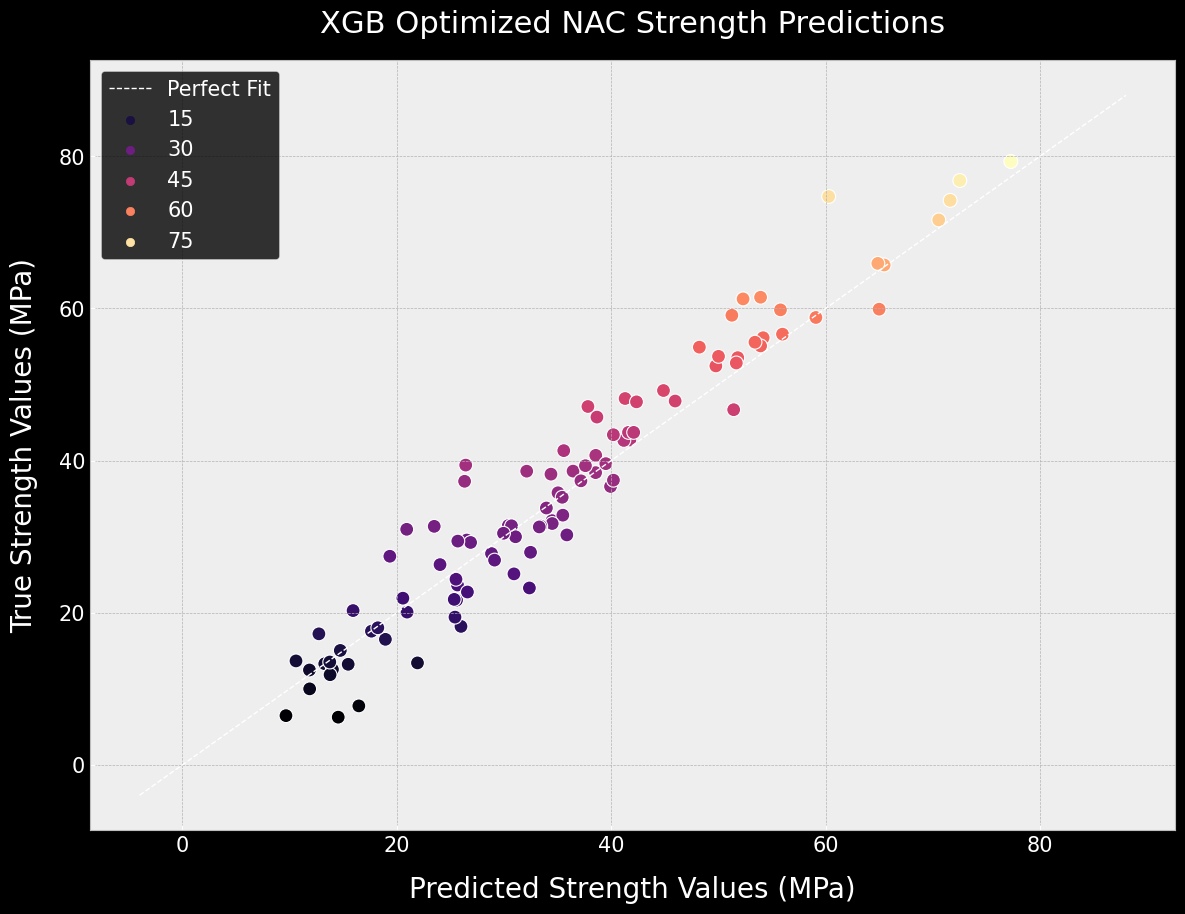

In [85]:
y_line = np.arange(int(Y_test_cs.min()) - 10, int(Y_test_cs.max()) + 10)
plt.figure(figsize = (14, 10))
ax = plt.axes()
plt.style.use('dark_background')
plt.plot(y_line, y_line, 'k--', lw = 1, label = 'Perfect Fit',color='w')
sns.scatterplot(x=y_pred_1_opt, y=Y_test_cs, s = 100,hue=Y_test_cs,palette='magma',markers=True)
plt.xlabel('Predicted Strength Values (MPa)', fontsize = 20, labelpad = 15)
plt.ylabel('True Strength Values (MPa)', fontsize = 20, labelpad = 15)
plt.title('XGB Optimized NAC Strength Predictions', fontsize = 22, c = 'w', pad = 20)
plt.legend(fontsize = 15)
plt.tick_params(labelsize = 15)
plt.show()

In [86]:
residuals_1_opt = Y_test_cs - y_pred_1_opt
residuals_1_opt

array([-2.37998810e+00,  3.83270355e+00, -1.87924744e+00, -2.01766907e+00,
        6.48551331e+00,  9.65602112e-01,  1.00390863e+01,  1.34230438e+00,
        1.46831955e+00, -2.66407364e+00,  2.44509888e-01, -5.09581696e+00,
        3.19331039e+00,  4.48784039e+00, -2.43420601e+00, -2.87368011e-01,
        7.83951935e+00,  2.09221573e+00, -1.11786232e+00,  2.17403732e+00,
       -1.25361481e-01,  3.03013496e+00, -2.77371719e+00, -7.78468018e+00,
       -5.63797501e+00,  1.44219810e+01,  4.01694183e+00,  1.04803772e+00,
       -1.90138092e-01, -3.34278885e+00,  7.21431656e-01,  1.07413971e+00,
        2.67257660e+00, -2.24242905e+00,  8.93527649e+00, -8.70751572e+00,
        5.72916870e+00, -3.19082096e+00, -1.06236313e+00,  4.36037949e+00,
       -5.82479706e+00,  4.28827362e+00,  4.32861252e+00,  9.27534637e+00,
        6.68089905e+00, -8.52697334e+00,  1.28317261e-02,  1.60742874e+00,
        3.06489006e+00,  2.12412994e+00, -1.09099915e+00,  3.68519348e+00,
        3.11269798e-01, -

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


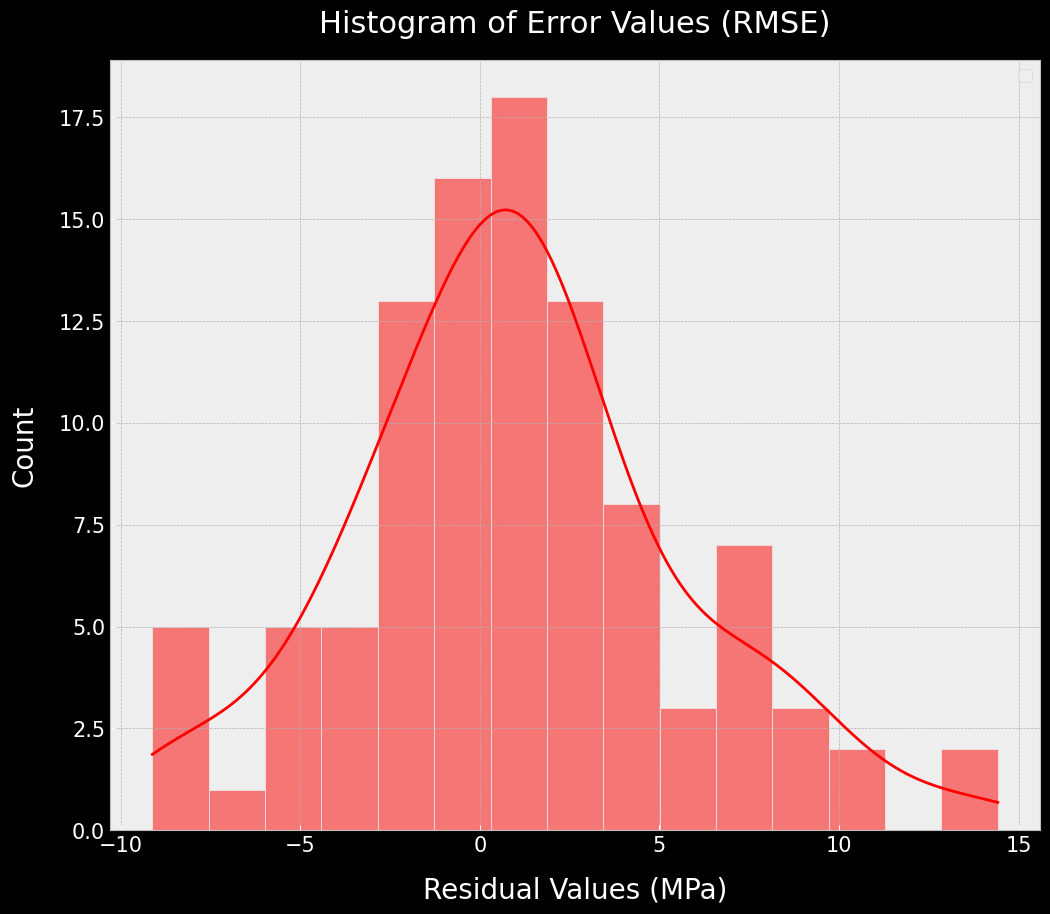

In [87]:
plt.style.use('bmh')
plt.figure(figsize = (12, 10))
ax = plt.axes()
sns.histplot(residuals_1_opt, bins = 15, alpha = 0.5,kde=True,color = 'r')
plt.xlabel('Residual Values (MPa)', fontsize = 20, labelpad = 15)
plt.ylabel('Count', fontsize = 20, labelpad = 15)
plt.title('Histogram of Error Values (RMSE)', fontsize = 22, c = 'w', pad = 20)
plt.tick_params(labelsize = 15)
plt.legend(fontsize = 12)
plt.show()

In [88]:
from sklearn.metrics import r2_score
yhat=model_opt_cs.predict(X_train_cs)
r_squared = r2_score(Y_train_cs,yhat)
print(r_squared)
yhat=model_opt_cs.predict(X_test_cs)
r_squared = r2_score(Y_test_cs,yhat)
print(r_squared)

0.9943090100539657
0.9268063703799776


#### Bayes Optimization For Carbonization Depth

In [89]:
'''
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
from sklearn import metrics

# Create hyperparameter space to search over
space = {'max_depth': hp.choice('max_depth', np.arange(3, 15, 1, dtype = int)),
        'n_estimators': hp.choice('n_estimators', np.arange(50, 300, 10, dtype = int)),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),
        'min_child_weight': hp.choice('min_child_weight', np.arange(0, 10, 1, dtype = int)),
        'subsample': hp.quniform('subsample', 0.5, 1.0, 0.1),
        'learning_rate': hp.quniform('learning_rate', 0.1, 0.3, 0.1),
         'gamma': hp.choice('gamma', np.arange(0, 20, 0.5, dtype = float)),
         'reg_alpha': hp.choice('reg_alpha', np.arange(0, 20, 0.5, dtype = float)),
         'reg_lambda': hp.choice('reg_lambda', np.arange(0, 20, 0.5, dtype = float)),
         
        'objective': 'reg:squarederror',
        
        'eval_metric': 'rmse'}

def score(params):
    model = XGBRegressor(**params)
    
    model.fit(X_train_c, Y_train_c, 
              eval_set = [(X_train_c, Y_train_c), (X_test_c, Y_test_c)],
              verbose = False, 
              early_stopping_rounds = 10)
    
    y_pred = model.predict(X_test_c)
    score = np.sqrt(metrics.mean_squared_error(Y_test_c, y_pred))
    print(score)
    return {'loss': score, 'status': STATUS_OK}    
    
def optimize(trials, space):
    
    best = fmin(score, space, algo = tpe.suggest, max_evals = 1000)
    return best

trials = Trials()
best_params = optimize(trials, space)
'''

"\nfrom hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval\nfrom sklearn import metrics\n\n# Create hyperparameter space to search over\nspace = {'max_depth': hp.choice('max_depth', np.arange(3, 15, 1, dtype = int)),\n        'n_estimators': hp.choice('n_estimators', np.arange(50, 300, 10, dtype = int)),\n        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),\n        'min_child_weight': hp.choice('min_child_weight', np.arange(0, 10, 1, dtype = int)),\n        'subsample': hp.quniform('subsample', 0.5, 1.0, 0.1),\n        'learning_rate': hp.quniform('learning_rate', 0.1, 0.3, 0.1),\n         'gamma': hp.choice('gamma', np.arange(0, 20, 0.5, dtype = float)),\n         'reg_alpha': hp.choice('reg_alpha', np.arange(0, 20, 0.5, dtype = float)),\n         'reg_lambda': hp.choice('reg_lambda', np.arange(0, 20, 0.5, dtype = float)),\n         \n        'objective': 'reg:squarederror',\n        \n        'eval_metric': 'rmse'}\n\ndef score(params):\n    model = 

In [90]:
#space_eval(space, best_params)

In [91]:
model_opt_c = XGBRegressor(max_depth = 13, 
                         n_estimators = 250, 
                         learning_rate = 0.30000000000000004, 
                         min_child_weight = 9, 
                         subsample = 0.5,
                         colsample_bytree = 0.5, 
                         gamma = 0.0, 
                         reg_alpha = 1.0, 
                         reg_lambda = 10.5, 
                         objective = 'reg:squarederror')

# Fit with hp datasets
model_opt_c.fit(X_train_c, Y_train_c, 
              eval_set = [(X_train_c, Y_train_c), (X_test_c, Y_test_c)], 
              eval_metric = 'rmse', 
              verbose = True, 
              early_stopping_rounds = 10)

[0]	validation_0-rmse:6.95596	validation_1-rmse:8.06241
[1]	validation_0-rmse:6.52066	validation_1-rmse:7.64984
[2]	validation_0-rmse:6.23590	validation_1-rmse:7.37103
[3]	validation_0-rmse:5.95659	validation_1-rmse:6.99031
[4]	validation_0-rmse:5.74576	validation_1-rmse:6.63967
[5]	validation_0-rmse:5.67557	validation_1-rmse:6.53222
[6]	validation_0-rmse:5.07983	validation_1-rmse:5.88759
[7]	validation_0-rmse:4.66707	validation_1-rmse:5.65669
[8]	validation_0-rmse:4.56924	validation_1-rmse:5.57690
[9]	validation_0-rmse:4.24678	validation_1-rmse:5.17186
[10]	validation_0-rmse:4.20193	validation_1-rmse:5.08475
[11]	validation_0-rmse:4.15403	validation_1-rmse:5.07898
[12]	validation_0-rmse:3.91190	validation_1-rmse:4.86490
[13]	validation_0-rmse:3.82957	validation_1-rmse:4.79876
[14]	validation_0-rmse:3.54321	validation_1-rmse:4.54484
[15]	validation_0-rmse:3.49189	validation_1-rmse:4.55050
[16]	validation_0-rmse:3.43893	validation_1-rmse:4.52674
[17]	validation_0-rmse:3.41568	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.30000000000000004,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=13, max_leaves=None,
             min_child_weight=9, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [92]:
y_pred_1_opt = model_opt_c.predict(X_test_c)

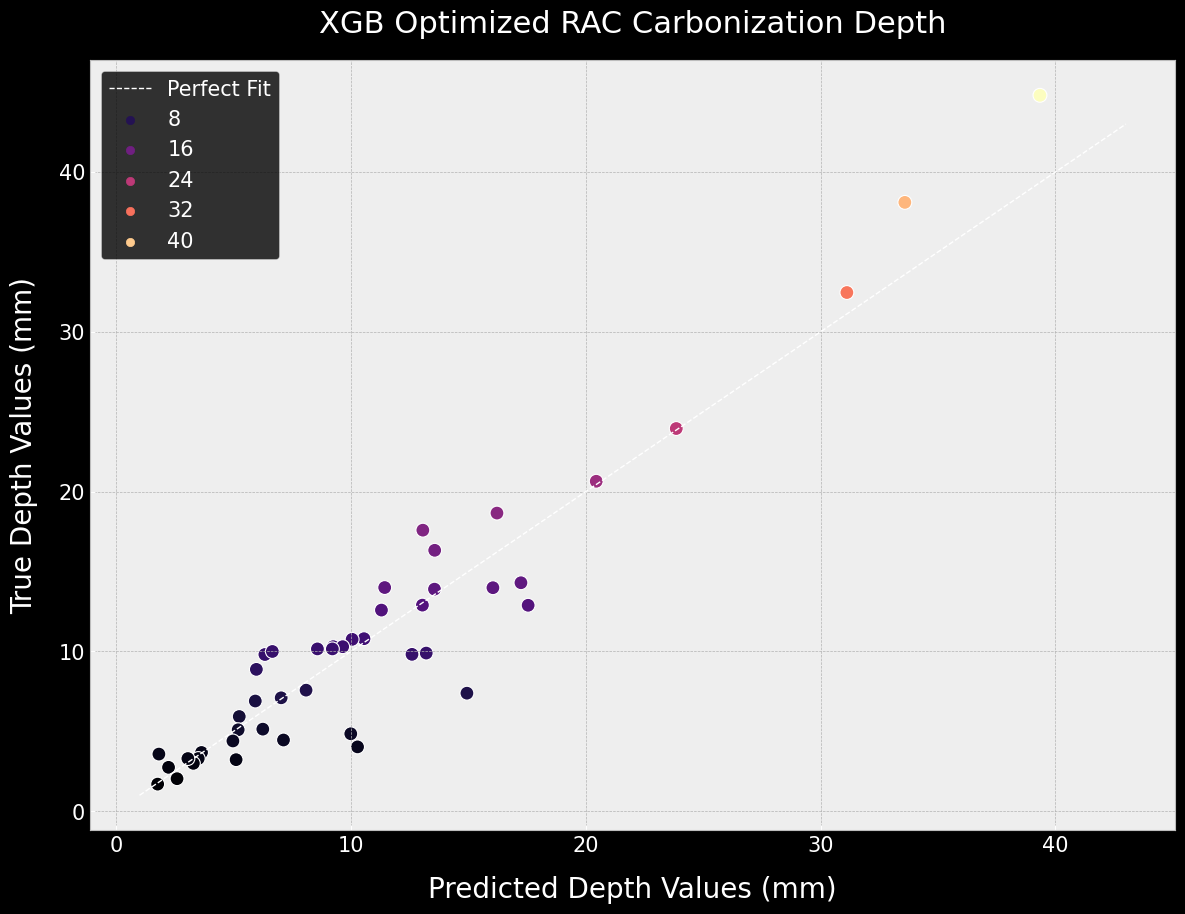

In [93]:
y_line = np.arange(int(Y_test_c.min()), int(Y_test_c.max()))
plt.figure(figsize = (14, 10))
ax = plt.axes()
plt.style.use('dark_background')
plt.plot(y_line, y_line, 'k--', lw = 1, label = 'Perfect Fit',color='w')
sns.scatterplot(x=y_pred_1_opt, y=Y_test_c, s = 100,hue=Y_test_c,palette='magma',markers=True)
plt.xlabel('Predicted Depth Values (mm)', fontsize = 20, labelpad = 15)
plt.ylabel('True Depth Values (mm)', fontsize = 20, labelpad = 15)
plt.title('XGB Optimized RAC Carbonization Depth', fontsize = 22, c = 'w', pad = 20)
plt.legend(fontsize = 15)
plt.tick_params(labelsize = 15)
plt.show()

In [94]:
residuals_1_opt = Y_test_c - y_pred_1_opt
residuals_1_opt

array([-6.25397179, -0.55821367, -0.07233577,  2.5602541 , -0.51148598,
        0.97060814,  2.43885628, -3.3083168 ,  0.24115448,  0.06852827,
        1.58462444,  1.050494  , -2.78254002, -0.14610443,  4.52494987,
       -4.65789734, -1.88282587,  0.6830036 ,  0.70679546,  0.64961224,
        2.76059444,  1.75410851,  2.90412319, -5.14607372,  0.20240822,
        0.94796196,  1.33962341, -2.94214745,  3.47124153, -2.67036013,
        3.34288025, -2.05873085,  1.28813442,  0.04036801, -0.10057583,
       -0.20127721,  5.45794754, -0.29334617,  0.51385117, -1.11050068,
       -7.55155502,  0.24030428, -0.5776969 ,  0.3399004 ,  4.51119003,
        0.09446449])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


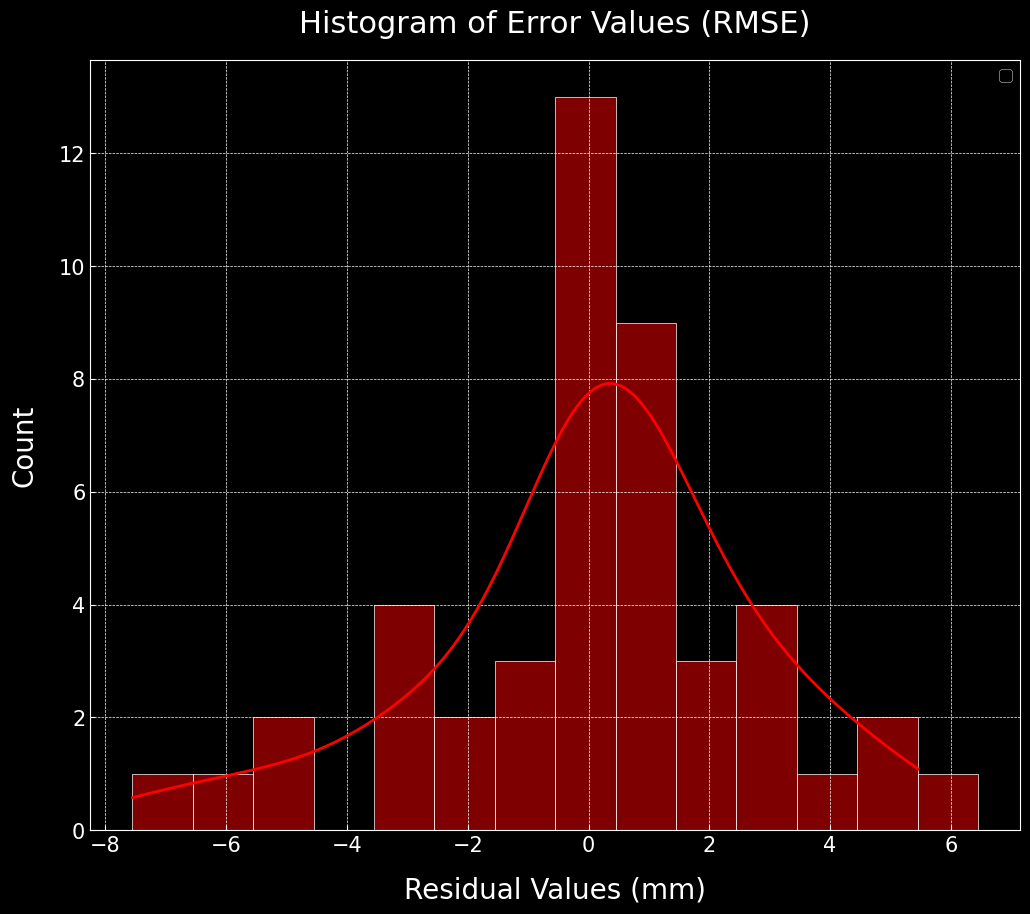

In [95]:
plt.figure(figsize = (12, 10))
ax = plt.axes()
sns.histplot(residuals_1_opt, bins = 5, alpha = 0.5,kde=True,binwidth=1,color = 'r')
plt.xlabel('Residual Values (mm)', fontsize = 20, labelpad = 15)
plt.ylabel('Count', fontsize = 20, labelpad = 15)
plt.title('Histogram of Error Values (RMSE)', fontsize = 22, c = 'w', pad = 20)
plt.tick_params(labelsize = 15)
plt.legend(fontsize = 12)
plt.style.use('bmh')
plt.show()

In [96]:
from sklearn.metrics import r2_score
yhat=model_opt_c.predict(X_train_c)
r_squared = r2_score(Y_train_c,yhat)
print(r_squared)
yhat=model_opt_c.predict(X_test_c)
r_squared = r2_score(Y_test_c,yhat)
print(r_squared)

0.9651402043902909
0.9120696230376829


#### Bayes Optimization for Sulfate Corrosion

In [97]:
'''
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
from sklearn import metrics

# Create hyperparameter space to search over
space = {'max_depth': hp.choice('max_depth', np.arange(3, 15, 1, dtype = int)),
        'n_estimators': hp.choice('n_estimators', np.arange(50, 300, 10, dtype = int)),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),
        'min_child_weight': hp.choice('min_child_weight', np.arange(0, 10, 1, dtype = int)),
        'subsample': hp.quniform('subsample', 0.5, 1.0, 0.1),
        'learning_rate': hp.quniform('learning_rate', 0.1, 0.3, 0.1),
         'gamma': hp.choice('gamma', np.arange(0, 20, 0.5, dtype = float)),
         'reg_alpha': hp.choice('reg_alpha', np.arange(0, 20, 0.5, dtype = float)),
         'reg_lambda': hp.choice('reg_lambda', np.arange(0, 20, 0.5, dtype = float)),
         
        'objective': 'reg:squarederror',
        
        'eval_metric': 'rmse'}

def score(params):
    model = XGBRegressor(**params)
    
    model.fit(X_train_sf, Y_train_sf, 
              eval_set = [(X_train_sf, Y_train_sf), (X_test_sf, Y_test_sf)],
              verbose = False, 
              early_stopping_rounds = 10)
    
    y_pred = model.predict(X_test_sf)
    score = np.sqrt(metrics.mean_squared_error(Y_test_sf, y_pred))
    print(score)
    return {'loss': score, 'status': STATUS_OK}    
    
def optimize(trials, space):
    
    best = fmin(score, space, algo = tpe.suggest, max_evals = 1000)
    return best

trials = Trials()
best_params = optimize(trials, space)
'''

"\nfrom hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval\nfrom sklearn import metrics\n\n# Create hyperparameter space to search over\nspace = {'max_depth': hp.choice('max_depth', np.arange(3, 15, 1, dtype = int)),\n        'n_estimators': hp.choice('n_estimators', np.arange(50, 300, 10, dtype = int)),\n        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),\n        'min_child_weight': hp.choice('min_child_weight', np.arange(0, 10, 1, dtype = int)),\n        'subsample': hp.quniform('subsample', 0.5, 1.0, 0.1),\n        'learning_rate': hp.quniform('learning_rate', 0.1, 0.3, 0.1),\n         'gamma': hp.choice('gamma', np.arange(0, 20, 0.5, dtype = float)),\n         'reg_alpha': hp.choice('reg_alpha', np.arange(0, 20, 0.5, dtype = float)),\n         'reg_lambda': hp.choice('reg_lambda', np.arange(0, 20, 0.5, dtype = float)),\n         \n        'objective': 'reg:squarederror',\n        \n        'eval_metric': 'rmse'}\n\ndef score(params):\n    model = 

In [98]:
#space_eval(space, best_params)

In [99]:
model_opt_sf = XGBRegressor(max_depth = 12, 
                         n_estimators = 250, 
                         learning_rate = 0.30000000000000004, 
                         min_child_weight = 4, 
                         subsample = 0.8,
                         colsample_bytree = 0.7000000000000001, 
                         gamma = 0.0, 
                         reg_alpha = 0.0, 
                         reg_lambda = 0.5, 
                         objective = 'reg:squarederror')

# Fit with hp datasets
model_opt_sf.fit(X_train_sf, Y_train_sf, 
              eval_set = [(X_train_sf, Y_train_sf), (X_test_sf, Y_test_sf)], 
              eval_metric = 'rmse', 
              verbose = True, 
              early_stopping_rounds = 10)

[0]	validation_0-rmse:0.17961	validation_1-rmse:0.13329
[1]	validation_0-rmse:0.13652	validation_1-rmse:0.09953
[2]	validation_0-rmse:0.11949	validation_1-rmse:0.08294
[3]	validation_0-rmse:0.09699	validation_1-rmse:0.06878
[4]	validation_0-rmse:0.07718	validation_1-rmse:0.06215
[5]	validation_0-rmse:0.06448	validation_1-rmse:0.05677
[6]	validation_0-rmse:0.05915	validation_1-rmse:0.05316
[7]	validation_0-rmse:0.04987	validation_1-rmse:0.05176
[8]	validation_0-rmse:0.04446	validation_1-rmse:0.04947
[9]	validation_0-rmse:0.04257	validation_1-rmse:0.04917
[10]	validation_0-rmse:0.03711	validation_1-rmse:0.04609
[11]	validation_0-rmse:0.03434	validation_1-rmse:0.05012
[12]	validation_0-rmse:0.03294	validation_1-rmse:0.05233
[13]	validation_0-rmse:0.03219	validation_1-rmse:0.05274
[14]	validation_0-rmse:0.03090	validation_1-rmse:0.05269
[15]	validation_0-rmse:0.02825	validation_1-rmse:0.05761
[16]	validation_0-rmse:0.02667	validation_1-rmse:0.05956
[17]	validation_0-rmse:0.02620	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7000000000000001, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.30000000000000004, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=250, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [100]:
y_pred_1_opt = model_opt_sf.predict(X_test_sf)

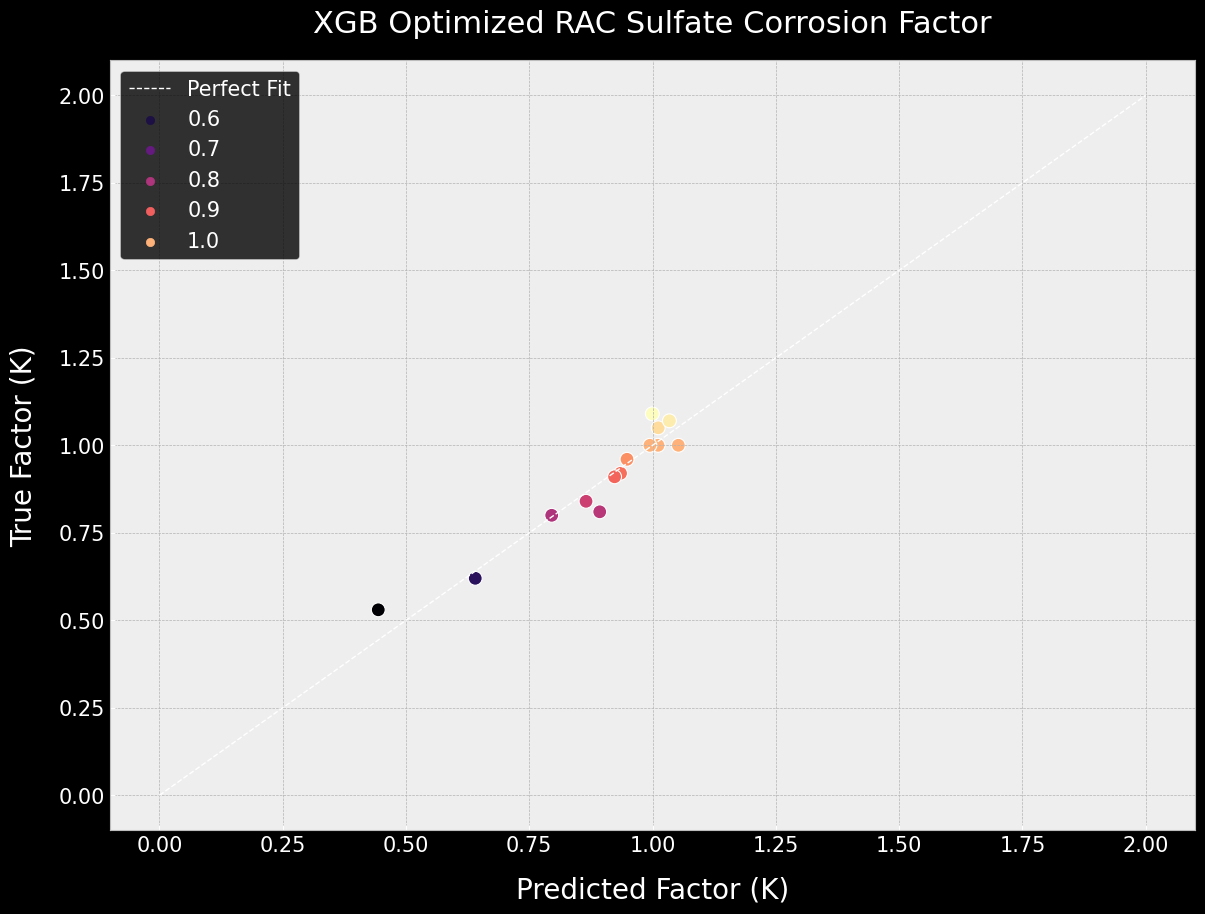

In [101]:
y_line = np.arange(int(Y_test_sf.min()), int(Y_test_sf.max())+1.5 )
plt.figure(figsize = (14, 10))
ax = plt.axes()
plt.style.use('dark_background')
plt.plot(y_line, y_line, 'k--', lw = 1, label = 'Perfect Fit',color='w')
sns.scatterplot(x=y_pred_1_opt, y=Y_test_sf, s = 100,hue=Y_test_sf,palette='magma',markers=True)
plt.xlabel('Predicted Factor (K)', fontsize = 20, labelpad = 15)
plt.ylabel('True Factor (K)', fontsize = 20, labelpad = 15)
plt.title('XGB Optimized RAC Sulfate Corrosion Factor', fontsize = 22, c = 'w', pad = 20)
plt.legend(fontsize = 15)
plt.tick_params(labelsize = 15)
plt.show()

In [102]:
residuals_1_opt = Y_test_sf - y_pred_1_opt
residuals_1_opt

array([ 0.0861842 , -0.01107907,  0.09049341, -0.0828445 ,  0.01182028,
       -0.02508405,  0.00546247, -0.0204534 , -0.01505979,  0.03854125,
       -0.01297417,  0.03589828, -0.05230093,  0.00450246])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


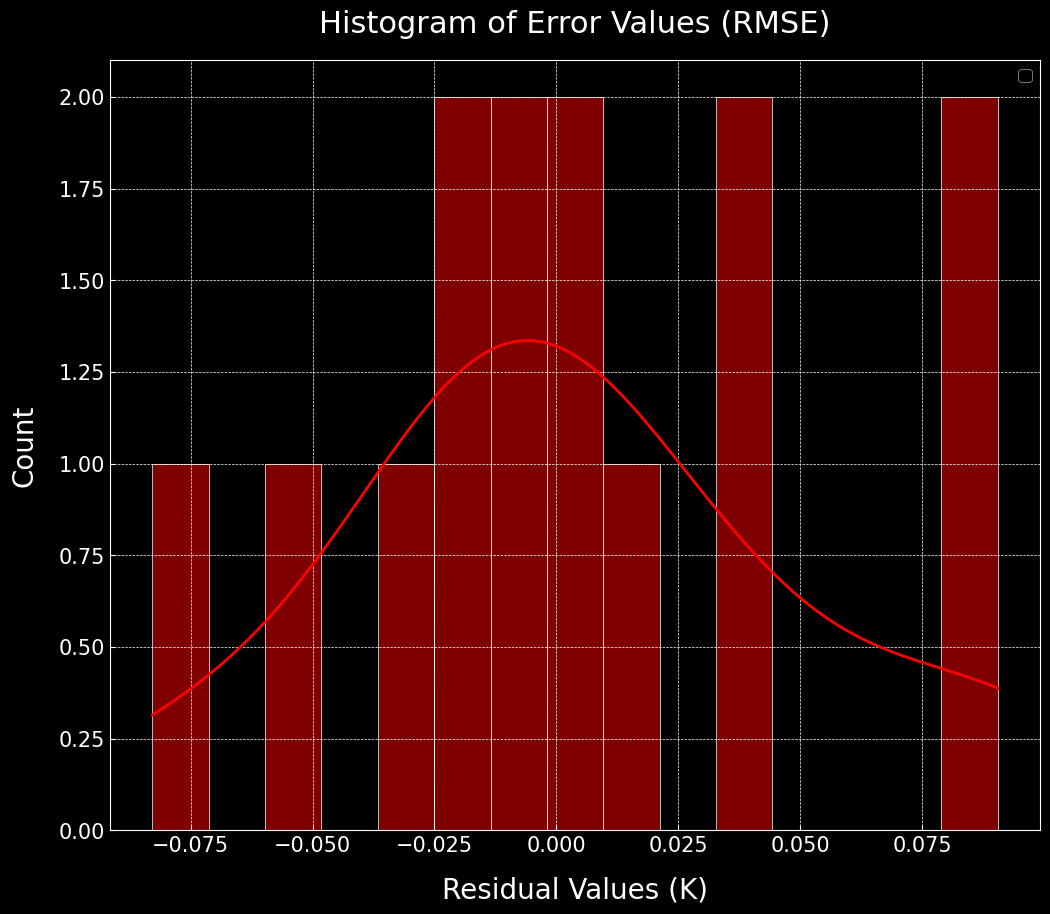

In [103]:
plt.figure(figsize = (12, 10))
ax = plt.axes()
sns.histplot(residuals_1_opt, bins = 15, alpha = 0.5,kde=True,color = 'r')
plt.xlabel('Residual Values (K)', fontsize = 20, labelpad = 15)
plt.ylabel('Count', fontsize = 20, labelpad = 15)
plt.title('Histogram of Error Values (RMSE)', fontsize = 22, c = 'w', pad = 20)
plt.tick_params(labelsize = 15)
plt.legend(fontsize = 12)
plt.style.use('bmh')
plt.show()

In [104]:
from sklearn.metrics import r2_score
yhat=model_opt_sf.predict(X_train_sf)
r_squared = r2_score(Y_train_sf,yhat)
print(r_squared)
yhat=model_opt_sf.predict(X_test_sf)
r_squared = r2_score(Y_test_sf,yhat)
print(r_squared)

0.9765716437323141
0.9170531556452696


#### Bayes Search Optimization for Chloride Ion Erosion

In [105]:
'''
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
from sklearn import metrics

# Create hyperparameter space to search over
space = {'max_depth': hp.choice('max_depth', np.arange(3, 15, 1, dtype = int)),
        'n_estimators': hp.choice('n_estimators', np.arange(50, 300, 10, dtype = int)),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),
        'min_child_weight': hp.choice('min_child_weight', np.arange(0, 10, 1, dtype = int)),
        'subsample': hp.quniform('subsample', 0.5, 1.0, 0.1),
        'learning_rate': hp.quniform('learning_rate', 0.1, 0.3, 0.1),
         'gamma': hp.choice('gamma', np.arange(0, 20, 0.5, dtype = float)),
         'reg_alpha': hp.choice('reg_alpha', np.arange(0, 20, 0.5, dtype = float)),
         'reg_lambda': hp.choice('reg_lambda', np.arange(0, 20, 0.5, dtype = float)),
         
        'objective': 'reg:squarederror',
        
        'eval_metric': 'rmse'}

def score(params):
    model = XGBRegressor(**params)
    
    model.fit(X_train_cl, Y_train_cl, 
              eval_set = [(X_train_cl, Y_train_cl), (X_test_cl, Y_test_cl)],
              verbose = False, 
              early_stopping_rounds = 10)
    
    y_pred = model.predict(X_test_cl)
    score = np.sqrt(metrics.mean_squared_error(Y_test_cl, y_pred))
    print(score)
    return {'loss': score, 'status': STATUS_OK}    
    
def optimize(trials, space):
    
    best = fmin(score, space, algo = tpe.suggest, max_evals = 1000)
    return best

trials = Trials()
best_params = optimize(trials, space)
'''

"\nfrom hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval\nfrom sklearn import metrics\n\n# Create hyperparameter space to search over\nspace = {'max_depth': hp.choice('max_depth', np.arange(3, 15, 1, dtype = int)),\n        'n_estimators': hp.choice('n_estimators', np.arange(50, 300, 10, dtype = int)),\n        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),\n        'min_child_weight': hp.choice('min_child_weight', np.arange(0, 10, 1, dtype = int)),\n        'subsample': hp.quniform('subsample', 0.5, 1.0, 0.1),\n        'learning_rate': hp.quniform('learning_rate', 0.1, 0.3, 0.1),\n         'gamma': hp.choice('gamma', np.arange(0, 20, 0.5, dtype = float)),\n         'reg_alpha': hp.choice('reg_alpha', np.arange(0, 20, 0.5, dtype = float)),\n         'reg_lambda': hp.choice('reg_lambda', np.arange(0, 20, 0.5, dtype = float)),\n         \n        'objective': 'reg:squarederror',\n        \n        'eval_metric': 'rmse'}\n\ndef score(params):\n    model = 

In [106]:
#space_eval(space, best_params)

In [107]:
model_opt_cl = XGBRegressor(max_depth = 11, 
                         n_estimators = 220, 
                         learning_rate = 0.2, 
                         min_child_weight = 0, 
                         subsample = 0.8,
                         colsample_bytree = 0.7000000000000001, 
                         gamma = 16.0, 
                         reg_alpha = 18.0, 
                         reg_lambda = 12.5, 
                         objective = 'reg:squarederror')

# Fit with hp datasets
model_opt_cl.fit(X_train_cl, Y_train_cl, 
              eval_set = [(X_train_cl, Y_train_cl), (X_test_cl, Y_test_cl)], 
              eval_metric = 'rmse', 
              verbose = True, 
              early_stopping_rounds = 10)

[0]	validation_0-rmse:1425.33231	validation_1-rmse:1475.35275
[1]	validation_0-rmse:1296.65150	validation_1-rmse:1375.77091
[2]	validation_0-rmse:1198.91084	validation_1-rmse:1324.06392
[3]	validation_0-rmse:1100.83960	validation_1-rmse:1280.34111
[4]	validation_0-rmse:1021.27555	validation_1-rmse:1242.31069
[5]	validation_0-rmse:954.59977	validation_1-rmse:1222.61617
[6]	validation_0-rmse:890.95717	validation_1-rmse:1178.63474
[7]	validation_0-rmse:832.41544	validation_1-rmse:1131.71069
[8]	validation_0-rmse:782.47720	validation_1-rmse:1086.40784
[9]	validation_0-rmse:737.37255	validation_1-rmse:1066.29312
[10]	validation_0-rmse:694.29454	validation_1-rmse:1028.90277
[11]	validation_0-rmse:661.94216	validation_1-rmse:1002.52841
[12]	validation_0-rmse:627.32613	validation_1-rmse:979.93187
[13]	validation_0-rmse:600.12623	validation_1-rmse:961.10195
[14]	validation_0-rmse:569.31552	validation_1-rmse:937.59599
[15]	validation_0-rmse:541.66679	validation_1-rmse:903.85870
[16]	validation_0

[122]	validation_0-rmse:73.67545	validation_1-rmse:436.52132
[123]	validation_0-rmse:72.79692	validation_1-rmse:433.30258
[124]	validation_0-rmse:72.08763	validation_1-rmse:432.78098
[125]	validation_0-rmse:71.75130	validation_1-rmse:431.69486
[126]	validation_0-rmse:71.08253	validation_1-rmse:429.39539
[127]	validation_0-rmse:70.97109	validation_1-rmse:429.53936
[128]	validation_0-rmse:69.86741	validation_1-rmse:429.18729
[129]	validation_0-rmse:68.52634	validation_1-rmse:427.27536
[130]	validation_0-rmse:68.06718	validation_1-rmse:427.44671
[131]	validation_0-rmse:67.28173	validation_1-rmse:427.09106
[132]	validation_0-rmse:66.14005	validation_1-rmse:428.02911
[133]	validation_0-rmse:65.68702	validation_1-rmse:427.23459
[134]	validation_0-rmse:65.14194	validation_1-rmse:428.73154
[135]	validation_0-rmse:64.78442	validation_1-rmse:428.01804
[136]	validation_0-rmse:63.83385	validation_1-rmse:428.01661
[137]	validation_0-rmse:62.87898	validation_1-rmse:428.00146
[138]	validation_0-rmse:

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7000000000000001, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=16.0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=11,
             max_leaves=None, min_child_weight=0, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=220,
             n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [108]:
y_pred_1_opt = model_opt_cl.predict(X_test_cl)

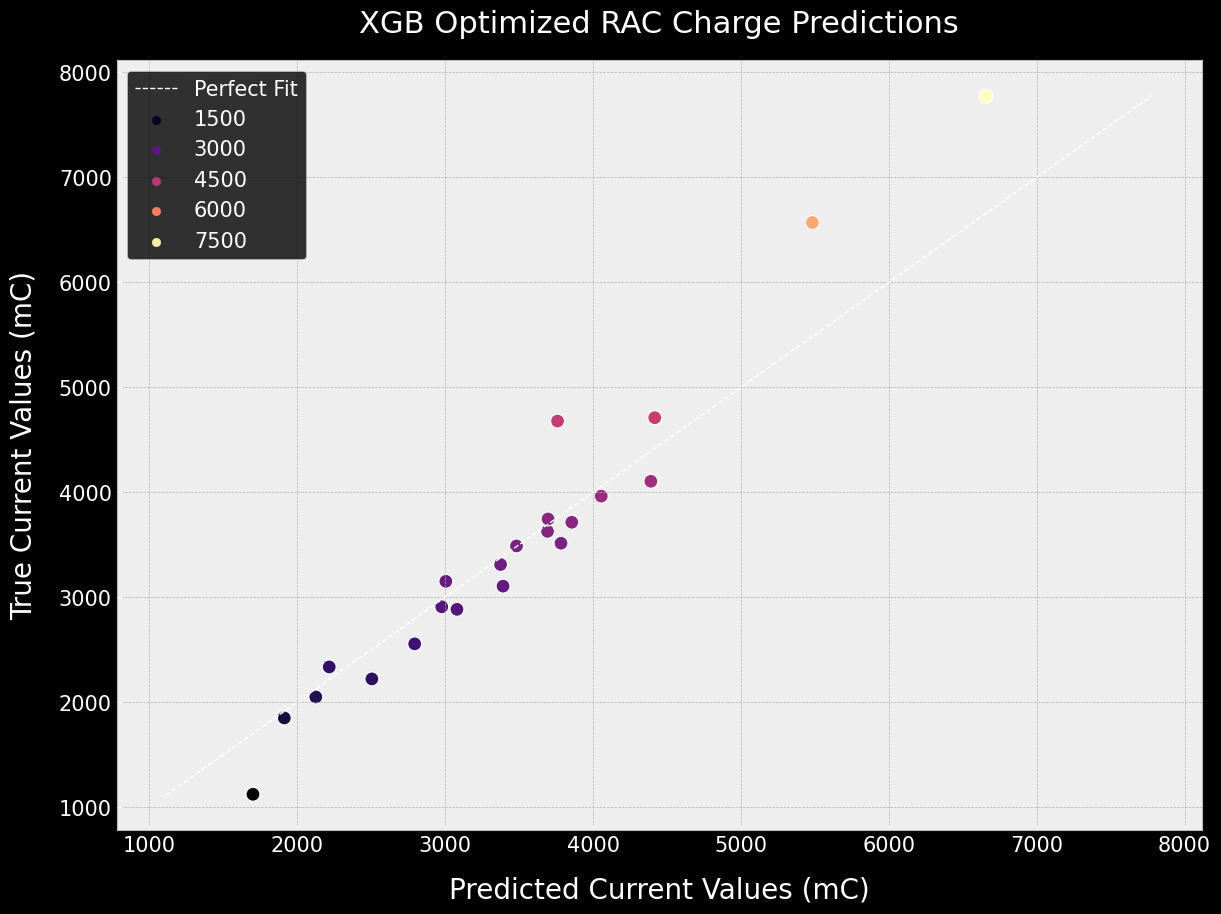

In [109]:
y_line = np.arange(int(Y_test_cl.min()) - 10, int(Y_test_cl.max()) + 10)
plt.figure(figsize = (14, 10))
ax = plt.axes()
plt.style.use('dark_background')
plt.plot(y_line, y_line, 'k--', lw = 1, label = 'Perfect Fit',color='w')
sns.scatterplot(x=y_pred_1_opt, y=Y_test_cl, s = 100,hue=Y_test_cl,palette='magma',markers=True)
plt.xlabel('Predicted Current Values (mC)', fontsize = 20, labelpad = 15)
plt.ylabel('True Current Values (mC)', fontsize = 20, labelpad = 15)
plt.title('XGB Optimized RAC Charge Predictions', fontsize = 22, c = 'w', pad = 20)
plt.legend(fontsize = 15)
plt.tick_params(labelsize = 15)
plt.show()

In [110]:
residuals_1_opt = Y_test_cl - y_pred_1_opt
residuals_1_opt

array([-283.10595703, 1116.54492188,  146.68896484, -142.08609375,
        -49.64245605,    5.98217773,  -76.078125  , -238.52978516,
       1087.04199219,  -64.84130859,  293.15625   , -268.98974609,
       -577.92687988, -286.7265625 ,  -63.3737793 , -286.03564453,
        -92.05688477, -195.45727539,   49.5965625 ,  119.38595703,
        -68.61547852,  -62.89794922,  918.35913086])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


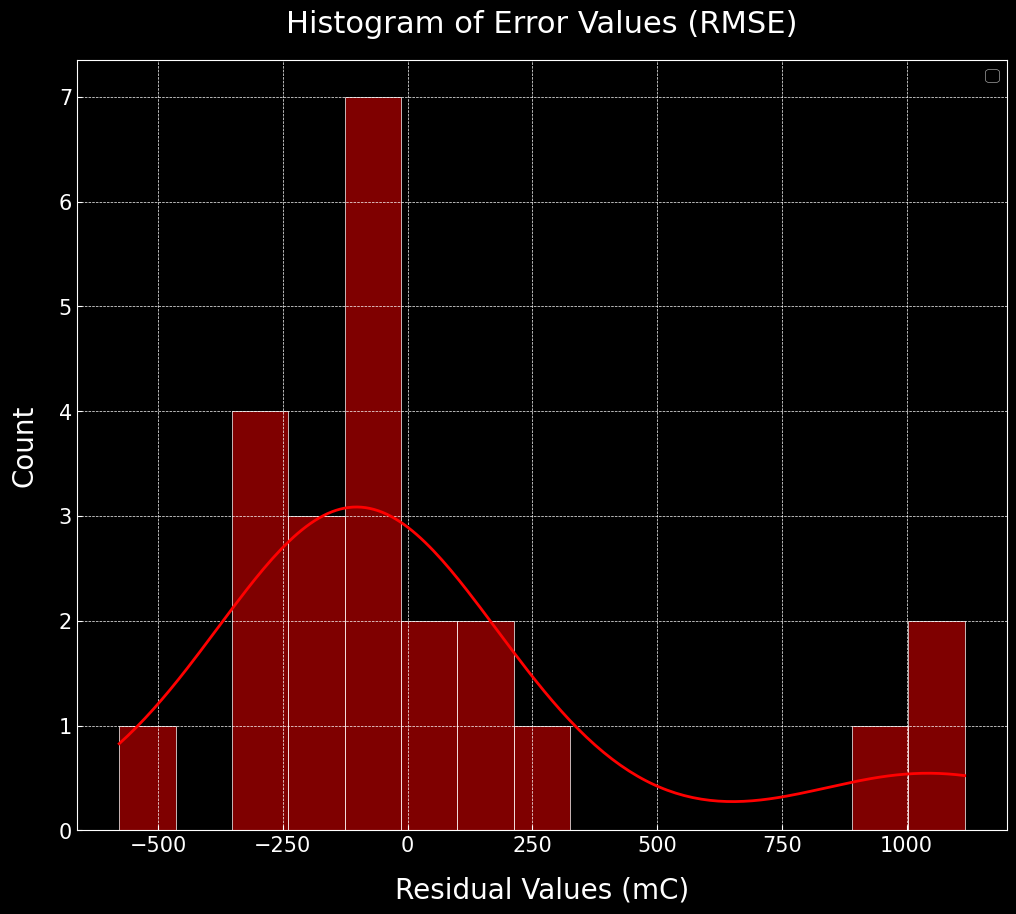

In [111]:
plt.figure(figsize = (12, 10))
ax = plt.axes()
sns.histplot(residuals_1_opt, bins = 15, alpha = 0.5,kde=True,color = 'r')
plt.xlabel('Residual Values (mC)', fontsize = 20, labelpad = 15)
plt.ylabel('Count', fontsize = 20, labelpad = 15)
plt.title('Histogram of Error Values (RMSE)', fontsize = 22, c = 'w', pad = 20)
plt.tick_params(labelsize = 15)
plt.legend(fontsize = 12)
plt.style.use('bmh')
plt.show()

In [112]:
from sklearn.metrics import r2_score
yhat=model_opt_cl.predict(X_train_cl)
r_squared = r2_score(Y_train_cl,yhat)
print(r_squared)
yhat=model_opt_cl.predict(X_test_cl)
r_squared = r2_score(Y_test_cl,yhat)
print(r_squared)

0.9981335371702095
0.9148813034026573


In [113]:
from skopt import BayesSearchCV
#Extreme Gradient Boosting Regressor Function Definition
from skopt.space import Real, Integer
#After Selection of Best Model using Bayes Search Optimizer to reduce overfitting
def bayes_xgb(X_train, Y_train):
   optimization = BayesSearchCV(
               XGBRegressor(),
         {
         'n_estimators' : Integer(50,800),
         'max_depth' :Integer(1,7),
         'learning_rate' : Real(0.01,1),
         'subsample' : Real(0.5,1),
         'colsample_bytree' : Real(0.5,1),
         'reg_alpha' : Real(0,20),
         'min_split_loss' : Integer(0,20),
         'min_child_weight' : Integer(0,20),
         'reg_lambda' : Real(0,20),
         'max_delta_step' : Integer(1,20)
      },
      n_iter=100,
      random_state=111
   )
   np.int = int
   # executes bayesian optimization
   _ = optimization.fit(X_train, Y_train)
   return _

In [114]:
#Extreme Gradient Boosting Regressor Function Definition
n_estimators = np.arange(50,800,50)
max_depth = np.arange(1,7,1)
learning_rate = np.logspace(0.01,1,10)
subsample = np.arange(0,1,0.1)
colsample_bytree = np.arange(0,1,0.1)
reg_alpha = np.arange(0,10,1)
min_split_loss = np.arange(0,10,1)
min_child_weight = np.arange(0,10,1)
reg_lambda = np.arange(0,10,1)
#sampling_method = ['uniform','gradient_based']
max_delta_step = np.arange(1,10,1)
def xgb(X_train,Y_train):
    parameters = {'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'subsample': subsample,
    'colsample_bytree': colsample_bytree,
    'reg_alpha': reg_alpha,
    'min_split_loss':min_split_loss,
    'min_child_weight':min_child_weight,
    'reg_lambda':reg_lambda,
    #'sampling_method':sampling_method,
    #'max_delta_step':max_delta_step,
    'gpu_id': [0]
    }
    xgb = XGBRegressor()
    xgb_cv = GridSearchCV(xgb,parameters,cv=5)
    xgb_cv.fit(X=X_train,y=Y_train)
    return xgb_cv

In [115]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [116]:
XGB_detailed = XGBRegressor(n_estimators=601,max_depth=6,learning_rate=0.4457817974015126,subsample=0.9788734713427625,colsample_bytree=0.6666273891320196,max_delta_step=3,reg_alpha=5.043999744632456,min_child_weight=1,min_split_loss=7,reg_lambda=6.499667302663611)

In [117]:
XGB_Acc = []
def XGB_fit(DT,X_train,Y_train,X_test,Y_test):
    DT.fit(X_train,Y_train)
    yhat = DT.predict(X_test)
    r_squared = r2_score(Y_test, yhat)
    mse = mean_squared_error(Y_test, yhat)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test, yhat)
    DT_row=[round(r_squared,3),round(mse,3),round(rmse,3),round(mae,3)]
    XGB_Acc.append(DT_row)

In [118]:
XGB_fit(XGB_detailed,X_train_det,Y_train_det,X_test_det,Y_test_det)

In [119]:
#Extreme Gradient Boosting Random Forest Regressor Function Definition
def xgbrf(X_train,Y_train):
    parameters = {'n_estimators': [50, 100, 200,500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'reg_lambda': [0, 0.1, 0.3],
    'reg_alpha': [0, 0.1, 0.3]}
    xgbrf = XGBRFRegressor()
    xgbrf_cv = GridSearchCV(xgbrf,parameters,cv=3)
    xgbrf_cv.fit(X=X_train,y=Y_train)
    print("tuned hyperparameters :(best parameters) ",xgbrf_cv.best_params_)
    print("accuracy :",xgbrf_cv.best_score_)
    

In [120]:
'''
xgbrf(X_train_det,Y_train_det)
xgbrf(X_train_cs,Y_train_cs)
xgbrf(X_train_c,Y_train_c)
xgbrf(X_train_cl,Y_train_cl)
xgbrf(X_train_sf,Y_train_sf)
'''

'\nxgbrf(X_train_det,Y_train_det)\nxgbrf(X_train_cs,Y_train_cs)\nxgbrf(X_train_c,Y_train_c)\nxgbrf(X_train_cl,Y_train_cl)\nxgbrf(X_train_sf,Y_train_sf)\n'

### Hyper Parameter Visualisations

In [121]:
hp_vis = pd.read_csv("Reference Tables.csv")

In [122]:
hp_vis

Algorithm Accuracy Metric  RAC Strength  NAC Strength  \
0    Decision Trees       R Squared        76.000        81.870   
1    Decision Trees             MSE        55.250        55.250   
2    Decision Trees            RMSE         6.600         6.600   
3    Decision Trees             MAE         5.000         5.000   
4     Random Forest       R Squared        83.400        85.870   
5     Random Forest             MSE        42.350        42.350   
6     Random Forest            RMSE         6.506         6.506   
7     Random Forest             MAE         4.465         4.465   
8          AdaBoost       R Squared        70.100        84.900   
9          AdaBoost             MSE        76.930        76.930   
10         AdaBoost            RMSE         8.771         8.771   
11         AdaBoost             MAE         7.029         7.029   
12             GBDT       R Squared        86.100        88.970   
13             GBDT             MSE        35.820        35.820   
14             GBDT            RMSE         5.985         5.985   
15             GBDT             MAE         4.093         4.093   
16  Historical GBDT       R Squared        83.000        79.990   
17  Historical GBDT             MSE        40.976        40.976   
18  Historical GBDT            RMSE         6.401         6.401   
19  Historical GBDT             MAE         4.486         4.486   
20          XGBoost       R Squared        91.600        89.998   
21          XGBoost             MSE        21.212        21.212   
22          XGBoost            RMSE         4.606         4.606   
23          XGBoost             MAE         3.764         3.764   
24       XGBoost RF       R Squared        83.300        87.979   
25       XGBoost RF             MSE        42.550        42.550   
26       XGBoost RF            RMSE         6.523         6.523   
27       XGBoost RF             MAE         4.506         4.506   

    RAC Carbonization  RAC Chloride Ion Erosion  RAC Sulfate Corrosion  
0              76.500                    51.000                 60.000  
1              12.600                 91787.000                  0.010  
2               3.550                  1044.000                  0.100  
3               2.483                   584.000                  0.061  
4              86.000                    76.800                 86.500  
5               7.400                 85718.000                  0.003  
6               2.720                   621.000                  0.057  
7               1.948                   439.000                  0.033  
8              71.600                    68.800                 81.900  
9              14.489                 12575.000                  0.004  
10              3.806                   615.000                  0.063  
11              3.073                   516.128                  0.043  
12             94.500                    86.500                 80.200  
13              3.207                 35718.000                  0.003  
14              1.791                   485.508                  0.058  
15              1.236                   332.121                  0.041  
16             92.900                    86.600                 74.900  
17              4.020                 45127.000                  0.005  
18              2.005                   495.000                  0.074  
19              1.286                   375.782                  0.049  
20             93.900                    86.300                 80.300  
21              3.867                 33844.000                  0.004  
22              1.967                   483.574                  0.066  
23              1.337                   349.100                  0.040  
24             86.400                    75.700                 75.000  
25              7.266                 13130.000                  0.003  
26              2.680                   634.000                  0.058  
27              1.860 

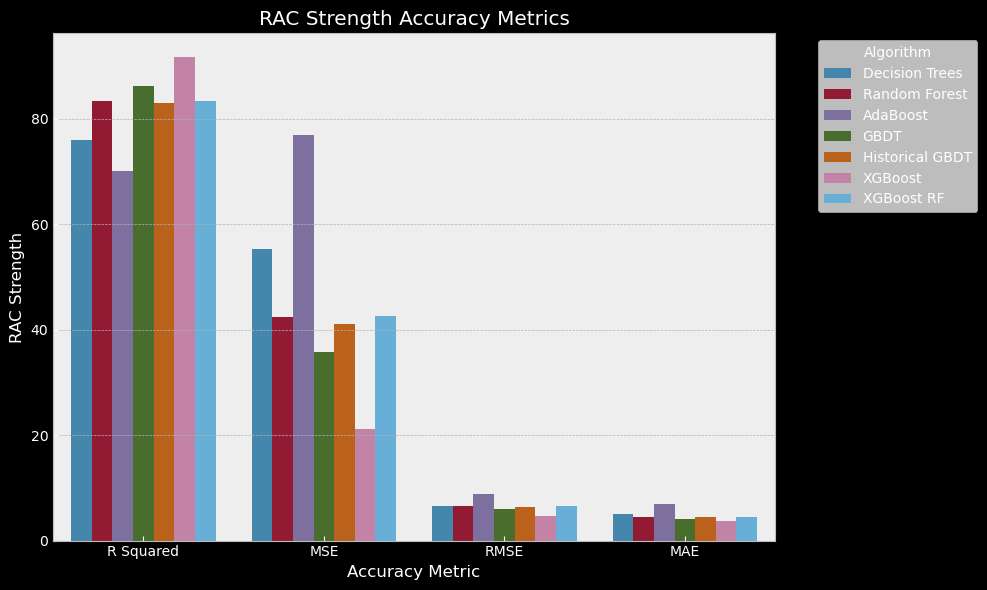

In [123]:
plt.figure(figsize=(10, 6))
sns.barplot(data=hp_vis, x='Accuracy Metric', y='RAC Strength', hue='Algorithm')
plt.xlabel('Accuracy Metric')
plt.ylabel('RAC Strength')
plt.title('RAC Strength Accuracy Metrics')
plt.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

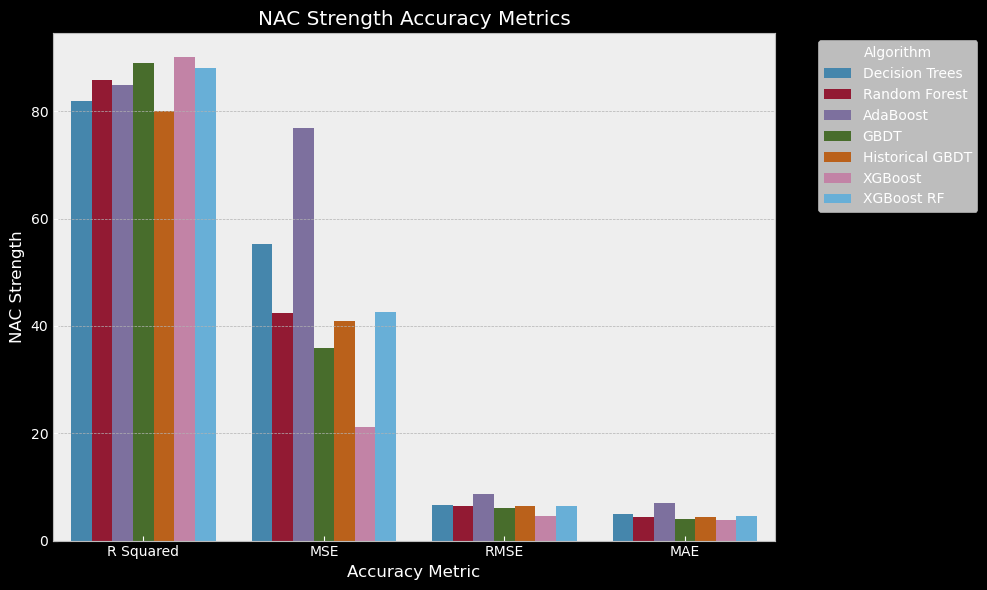

In [124]:
plt.figure(figsize=(10, 6))
sns.barplot(data=hp_vis, x='Accuracy Metric', y='NAC Strength', hue='Algorithm')
plt.xlabel('Accuracy Metric')
plt.ylabel('NAC Strength')
plt.title('NAC Strength Accuracy Metrics')
plt.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

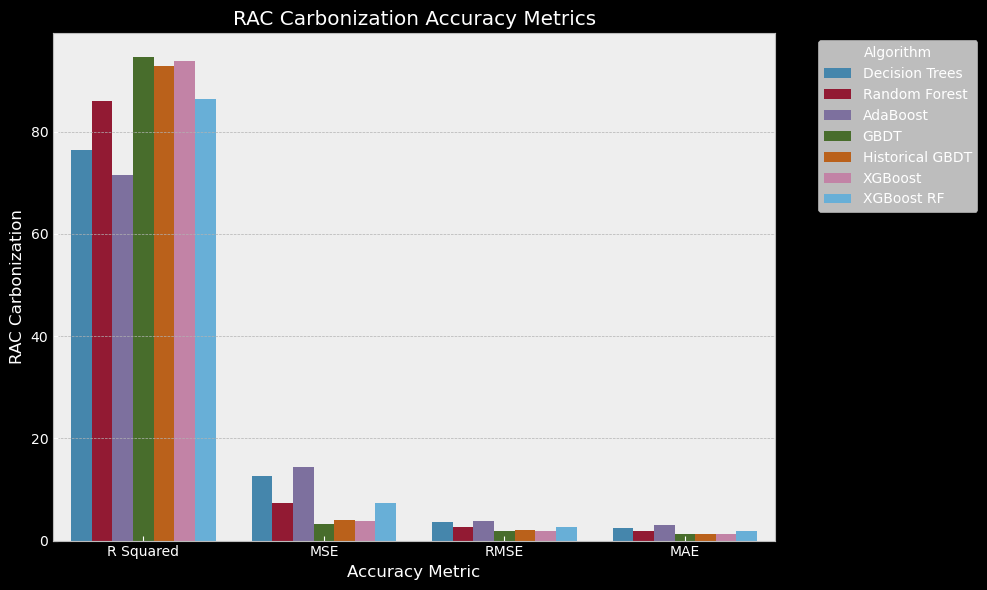

In [125]:
plt.figure(figsize=(10, 6))
sns.barplot(data=hp_vis, x='Accuracy Metric', y='RAC Carbonization', hue='Algorithm')

plt.xlabel('Accuracy Metric')
plt.ylabel('RAC Carbonization')
plt.title('RAC Carbonization Accuracy Metrics')
plt.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

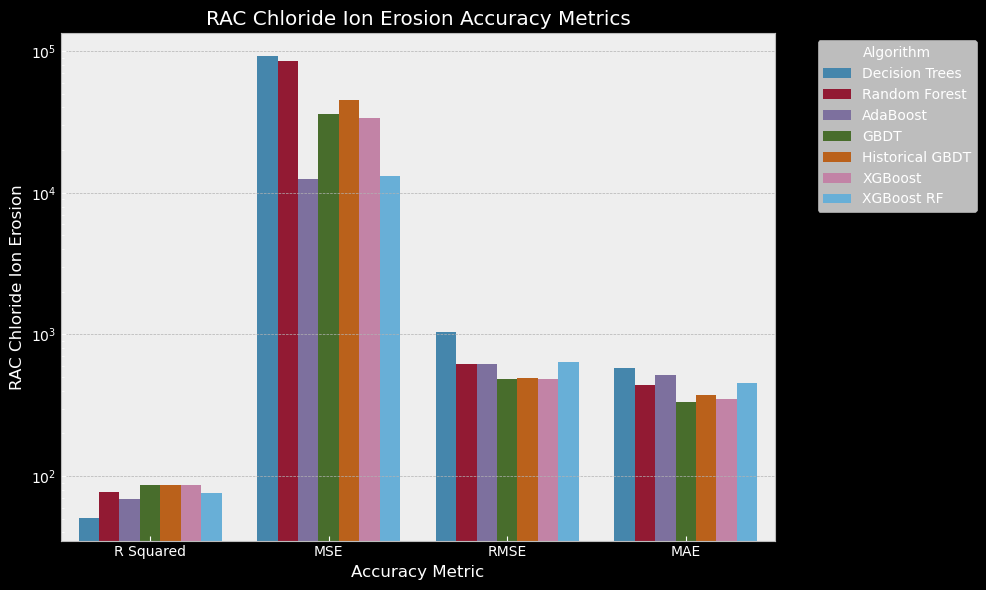

In [126]:
plt.figure(figsize=(10, 6))
sns.barplot(data=hp_vis, x='Accuracy Metric', y='RAC Chloride Ion Erosion', hue='Algorithm')

plt.xlabel('Accuracy Metric')
plt.ylabel('RAC Chloride Ion Erosion')
plt.yscale('log') 
plt.title('RAC Chloride Ion Erosion Accuracy Metrics')
plt.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

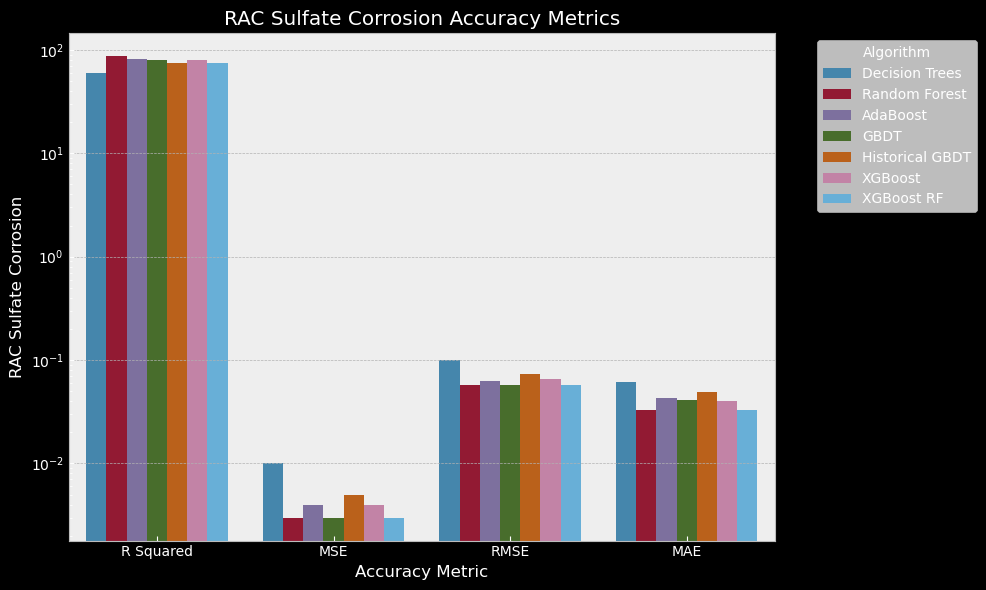

In [127]:
plt.figure(figsize=(10, 6))
sns.barplot(data=hp_vis, x='Accuracy Metric', y='RAC Sulfate Corrosion', hue='Algorithm')

plt.xlabel('Accuracy Metric')
plt.ylabel('RAC Sulfate Corrosion')
plt.yscale('log') 
plt.title('RAC Sulfate Corrosion Accuracy Metrics')
plt.legend(title='Algorithm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Model Training And Fitting Based On Optimized Hyper Parameters

In [128]:
DT_detailed = DecisionTreeRegressor(criterion='squared_error',max_depth=5,max_features=100,min_samples_leaf=1,min_samples_split=2)
DT_cs = DecisionTreeRegressor(criterion='squared_error',max_depth=10,max_features=500,min_samples_leaf=1,min_samples_split=2)
DT_c= DecisionTreeRegressor(criterion='squared_error',max_depth=10,max_features=1000,min_samples_leaf=2,min_samples_split=2)
DT_cl = DecisionTreeRegressor(criterion='squared_error',max_depth=7,max_features=1000,min_samples_leaf=2,min_samples_split=2)
DT_sf = DecisionTreeRegressor(criterion='squared_error',max_depth=5,max_features=500,min_samples_leaf=1,min_samples_split=5)


In [129]:
DT_Acc = []
def dt_fit(DT,X_train,Y_train,X_test,Y_test):
    DT.fit(X_train,Y_train)
    yhat = DT.predict(X_test)
    r_squared = r2_score(Y_test, yhat)
    mse = mean_squared_error(Y_test, yhat)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test, yhat)
    DT_row=[round(r_squared,3),round(mse,3),round(rmse,3),round(mae,3)]
    DT_Acc.append(DT_row)



In [130]:
dt_fit(DT_detailed,X_train_det,Y_train_det,X_test_det,Y_test_det)
dt_fit(DT_cs,X_train_cs,Y_train_cs,X_test_cs,Y_test_cs)
dt_fit(DT_c,X_train_c,Y_train_c,X_test_c,Y_test_c)
dt_fit(DT_cl,X_train_cl,Y_train_cl,X_test_cl,Y_test_cl)
dt_fit(DT_sf,X_train_sf,Y_train_sf,X_test_sf,Y_test_sf)

In [131]:
DT_Acc

[[0.475, 81.276, 9.015, 6.645],
 [0.85, 45.397, 6.738, 5.132],
 [0.826, 14.006, 3.743, 2.543],
 [0.417, 1248681.907, 1117.444, 742.781],
 [0.851, 0.004, 0.062, 0.044]]

In [132]:
RF_detailed = RandomForestRegressor(bootstrap=True,max_depth=9,max_samples=0.9,min_samples_leaf=1,min_samples_split=2,n_estimators=300)
RF_cs = RandomForestRegressor(bootstrap=True,max_depth=9,max_samples=0.9,min_samples_leaf=1,min_samples_split=2,n_estimators=300)
RF_c= RandomForestRegressor(bootstrap=True,max_depth=9,max_samples=0.9,min_samples_leaf=1,min_samples_split=2,n_estimators=100)
RF_cl = RandomForestRegressor(bootstrap=True,max_depth=9,max_samples=0.7,min_samples_leaf=1,min_samples_split=2,n_estimators=100)
RF_sf = RandomForestRegressor(bootstrap=True,max_depth=7,max_samples=0.9,min_samples_leaf=1,min_samples_split=2,n_estimators=300)

In [133]:
RF_Acc = []
def rf_fit(DT,X_train,Y_train,X_test,Y_test):
    DT.fit(X_train,Y_train)
    yhat = DT.predict(X_test)
    r_squared = r2_score(Y_test, yhat)
    mse = mean_squared_error(Y_test, yhat)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test, yhat)
    DT_row=[round(r_squared,3),round(mse,3),round(rmse,3),round(mae,3)]
    RF_Acc.append(DT_row)

In [134]:
rf_fit(RF_detailed,X_train_det,Y_train_det,X_test_det,Y_test_det)
rf_fit(RF_cs,X_train_cs,Y_train_cs,X_test_cs,Y_test_cs)
rf_fit(RF_c,X_train_c,Y_train_c,X_test_c,Y_test_c)
rf_fit(RF_cl,X_train_cl,Y_train_cl,X_test_cl,Y_test_cl)
rf_fit(RF_sf,X_train_sf,Y_train_sf,X_test_sf,Y_test_sf)

In [135]:
RF_Acc

[[0.74, 40.2, 6.34, 4.454],
 [0.892, 32.608, 5.71, 4.604],
 [0.888, 9.004, 3.001, 2.115],
 [0.659, 730205.567, 854.521, 502.111],
 [0.956, 0.001, 0.034, 0.025]]

In [136]:
ada_detailed = AdaBoostRegressor(learning_rate=1,loss='square',n_estimators=50)
ada_cs = AdaBoostRegressor(learning_rate=1,loss='square',n_estimators=500)
ada_c= AdaBoostRegressor(learning_rate=0.1,loss='square',n_estimators=500)
ada_cl = AdaBoostRegressor(learning_rate=1,loss='square',n_estimators=1000)
ada_sf = AdaBoostRegressor(learning_rate=0.01,loss='square',n_estimators=100)

In [137]:
ada_Acc = []
def ada_fit(DT,X_train,Y_train,X_test,Y_test):
    DT.fit(X_train,Y_train)
    yhat = DT.predict(X_test)
    r_squared = r2_score(Y_test, yhat)
    mse = mean_squared_error(Y_test, yhat)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test, yhat)
    DT_row=[round(r_squared,3),round(mse,3),round(rmse,3),round(mae,3)]
    ada_Acc.append(DT_row)

In [138]:
ada_fit(ada_detailed,X_train_det,Y_train_det,X_test_det,Y_test_det)
ada_fit(ada_cs,X_train_cs,Y_train_cs,X_test_cs,Y_test_cs)
ada_fit(ada_c,X_train_c,Y_train_c,X_test_c,Y_test_c)
ada_fit(ada_cl,X_train_cl,Y_train_cl,X_test_cl,Y_test_cl)
ada_fit(ada_sf,X_train_sf,Y_train_sf,X_test_sf,Y_test_sf)

In [139]:
ada_Acc

[[0.699, 46.556, 6.823, 5.457],
 [0.784, 65.303, 8.081, 6.736],
 [0.808, 15.437, 3.929, 3.291],
 [0.755, 525648.062, 725.016, 513.442],
 [0.896, 0.003, 0.052, 0.04]]

In [140]:
GBDT_detailed = GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.075,loss='squared_error',max_depth=3,n_estimators=231,subsample=0.9)
GBDT_cs = GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.15,loss='squared_error',max_depth=5,n_estimators=100,subsample=0.8)
GBDT_c= GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.15,loss='squared_error',max_depth=3,n_estimators=231,subsample=0.8)
GBDT_cl = GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.2,loss='squared_error',max_depth=3,n_estimators=231,subsample=0.8)
GBDT_sf = GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.2,loss='squared_error',max_depth=3,n_estimators=50,subsample=0.9)

In [141]:
GBDT_Acc = []
def GBDT_fit(DT,X_train,Y_train,X_test,Y_test):
    DT.fit(X_train,Y_train)
    yhat = DT.predict(X_test)
    r_squared = r2_score(Y_test, yhat)
    mse = mean_squared_error(Y_test, yhat)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test, yhat)
    DT_row=[round(r_squared,3),round(mse,3),round(rmse,3),round(mae,3)]
    GBDT_Acc.append(DT_row)

In [142]:
GBDT_fit(GBDT_detailed,X_train_det,Y_train_det,X_test_det,Y_test_det)
GBDT_fit(GBDT_cs,X_train_cs,Y_train_cs,X_test_cs,Y_test_cs)
GBDT_fit(GBDT_c,X_train_c,Y_train_c,X_test_c,Y_test_c)
GBDT_fit(GBDT_cl,X_train_cl,Y_train_cl,X_test_cl,Y_test_cl)
GBDT_fit(GBDT_sf,X_train_sf,Y_train_sf,X_test_sf,Y_test_sf)

In [143]:
GBDT_Acc

[[0.83, 26.303, 5.129, 3.382],
 [0.928, 21.724, 4.661, 3.171],
 [0.921, 6.323, 2.514, 1.602],
 [0.958, 90144.11, 300.24, 243.287],
 [0.904, 0.002, 0.05, 0.034]]

In [144]:
histR_detailed = HistGradientBoostingRegressor(learning_rate=0.1,loss='squared_error',max_depth=4,max_iter=200,min_samples_leaf=5)
histR_cs = HistGradientBoostingRegressor(learning_rate=0.1,loss='squared_error',max_depth=5,max_iter=100,min_samples_leaf=5)
histR_c= HistGradientBoostingRegressor(learning_rate=0.1,loss='squared_error',max_depth=3,max_iter=500,min_samples_leaf=5)
histR_cl = HistGradientBoostingRegressor(learning_rate=0.2,loss='squared_error',max_depth=3,max_iter=200,min_samples_leaf=5)
histR_sf = HistGradientBoostingRegressor(learning_rate=0.2,loss='squared_error',max_depth=4,max_iter=500,min_samples_leaf=10)

In [145]:
histR_Acc = []
def histR_fit(DT,X_train,Y_train,X_test,Y_test):
    DT.fit(X_train,Y_train)
    yhat = DT.predict(X_test)
    r_squared = r2_score(Y_test, yhat)
    mse = mean_squared_error(Y_test, yhat)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test, yhat)
    DT_row=[round(r_squared,3),round(mse,3),round(rmse,3),round(mae,3)]
    histR_Acc.append(DT_row)

In [146]:
histR_fit(histR_detailed,X_train_det,Y_train_det,X_test_det,Y_test_det)
histR_fit(histR_cs,X_train_cs,Y_train_cs,X_test_cs,Y_test_cs)
histR_fit(histR_c,X_train_c,Y_train_c,X_test_c,Y_test_c)
histR_fit(histR_cl,X_train_cl,Y_train_cl,X_test_cl,Y_test_cl)
histR_fit(histR_sf,X_train_sf,Y_train_sf,X_test_sf,Y_test_sf)

In [147]:
histR_Acc

[[0.819, 28.061, 5.297, 3.266],
 [0.927, 21.983, 4.689, 3.525],
 [0.913, 6.974, 2.641, 1.638],
 [0.941, 127332.03, 356.836, 253.899],
 [0.752, 0.006, 0.08, 0.056]]

In [148]:
XGB_detailed = XGBRegressor(n_estimators=200,max_depth=5,learning_rate=0.1,subsample=0.9,colsample_bytree=0.8,gamma=0.5,reg_alpha=0.3)
XGB_cs = XGBRegressor(n_estimators=100,max_depth=5,learning_rate=0.1,subsample=1,colsample_bytree=1,gamma=0,reg_alpha=0.1)
XGB_c= XGBRegressor(n_estimators=200,max_depth=3,learning_rate=0.2,subsample=0.9,colsample_bytree=1,gamma=0.1,reg_alpha=0.3)
XGB_cl = XGBRegressor(n_estimators=207,max_depth=3,learning_rate=0.1,subsample=0.8,colsample_bytree=0.8,gamma=0,reg_alpha=0)
XGB_sf = XGBRegressor(n_estimators=200,max_depth=5,learning_rate=0.2,subsample=0.8,colsample_bytree=1,gamma=0,reg_alpha=0.1)

In [149]:
XGB_Acc = []
def XGB_fit(DT,X_train,Y_train,X_test,Y_test):
    DT.fit(X_train,Y_train)
    yhat = DT.predict(X_test)
    r_squared = r2_score(Y_test, yhat)
    mse = mean_squared_error(Y_test, yhat)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test, yhat)
    DT_row=[round(r_squared,3),round(mse,3),round(rmse,3),round(mae,3)]
    XGB_Acc.append(DT_row)

In [150]:
XGB_fit(XGB_detailed,X_train_det,Y_train_det,X_test_det,Y_test_det)
XGB_fit(XGB_cs,X_train_cs,Y_train_cs,X_test_cs,Y_test_cs)
XGB_fit(XGB_c,X_train_c,Y_train_c,X_test_c,Y_test_c)
XGB_fit(XGB_cl,X_train_cl,Y_train_cl,X_test_cl,Y_test_cl)
XGB_fit(XGB_sf,X_train_sf,Y_train_sf,X_test_sf,Y_test_sf)

In [151]:
XGB_Acc

[[0.845, 24.027, 4.902, 3.429],
 [0.927, 22.105, 4.702, 3.619],
 [0.915, 6.808, 2.609, 1.706],
 [0.97, 63227.726, 251.451, 197.206],
 [0.872, 0.003, 0.057, 0.039]]

In [152]:
XGBRF_detailed = XGBRFRegressor(learning_rate=0.3,max_depth=7,n_estimators=50,subsample=1,reg_lambda=0,reg_alpha=0)
XGBRF_cs = XGBRFRegressor(learning_rate=0.3,max_depth=7,n_estimators=50,subsample=1,reg_lambda=0,reg_alpha=0)
XGBRF_c= XGBRFRegressor(learning_rate=0.3,max_depth=7,n_estimators=100,subsample=1,reg_lambda=0,reg_alpha=0.1)
XGBRF_cl = XGBRFRegressor(learning_rate=0.3,max_depth=7,n_estimators=500,subsample=0.8,reg_lambda=0,reg_alpha=0.3)
XGBRF_sf = XGBRFRegressor(learning_rate=0.3,max_depth=7,n_estimators=50,subsample=1,reg_lambda=0,reg_alpha=0)

In [153]:
XGBRF_Acc = []
def XGBRF_fit(DT,X_train,Y_train,X_test,Y_test):
    DT.fit(X_train,Y_train)
    yhat = DT.predict(X_test)
    r_squared = r2_score(Y_test, yhat)
    mse = mean_squared_error(Y_test, yhat)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test, yhat)
    DT_row=[round(r_squared,3),round(mse,3),round(rmse,3),round(mae,3)]
    XGBRF_Acc.append(DT_row)

In [154]:
XGBRF_fit(RF_detailed,X_train_det,Y_train_det,X_test_det,Y_test_det)
XGBRF_fit(RF_cs,X_train_cs,Y_train_cs,X_test_cs,Y_test_cs)
XGBRF_fit(RF_c,X_train_c,Y_train_c,X_test_c,Y_test_c)
XGBRF_fit(RF_cl,X_train_cl,Y_train_cl,X_test_cl,Y_test_cl)
XGBRF_fit(RF_sf,X_train_sf,Y_train_sf,X_test_sf,Y_test_sf)

In [155]:
XGBRF_Acc

[[0.746, 39.35, 6.273, 4.501],
 [0.891, 32.876, 5.734, 4.616],
 [0.879, 9.688, 3.113, 2.189],
 [0.636, 779733.317, 883.025, 518.11],
 [0.954, 0.001, 0.034, 0.025]]

### Residual Analysis Based On Best Model (According to Accuracy Metrics)

In [156]:
yhat=model_opt_det.predict(X_train_det)
r_squared = r2_score(Y_train_det,yhat)
r_squared

0.9828913060585717

In [157]:
yhat =model_opt_det.predict(X_test_det)
r_squared = r2_score(Y_test_det, yhat)
r_squared

0.8458259920057063

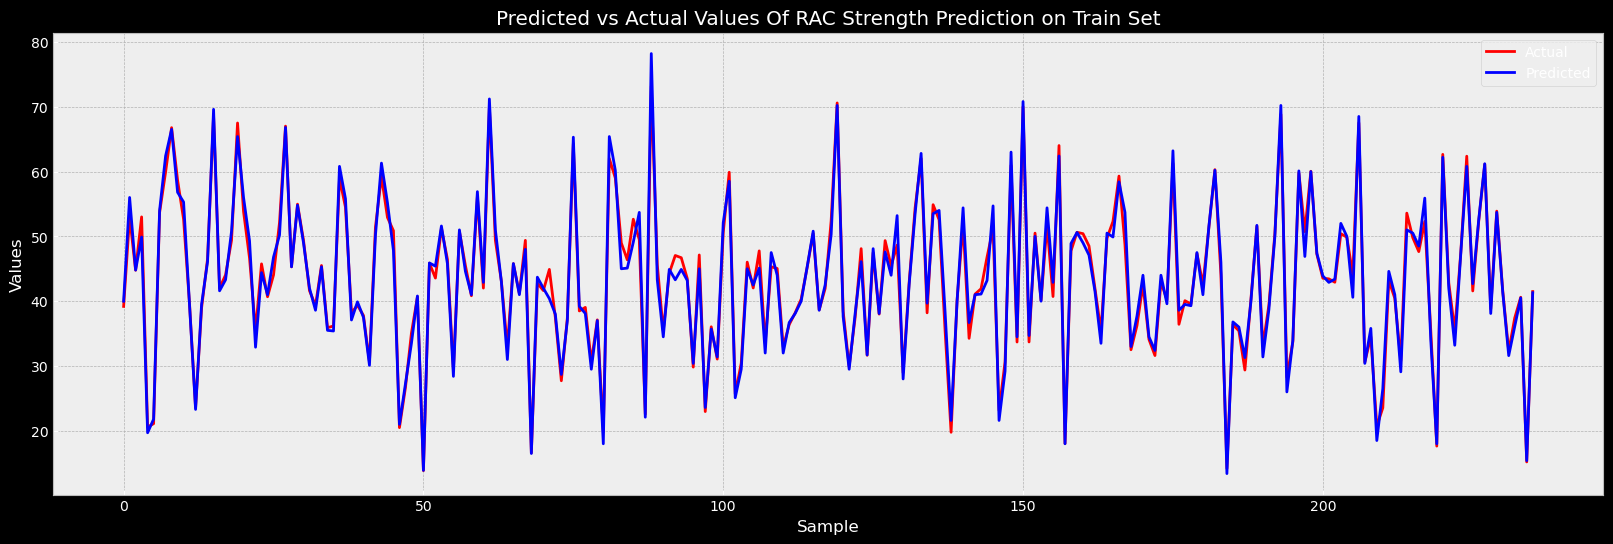

In [158]:
detailed_predicted = model_opt_det.predict(X_train_det)
plt.figure(figsize=(20, 6))
plt.plot(detailed_predicted, color='red', label='Actual')
plt.plot(Y_train_det, color='blue', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values Of RAC Strength Prediction on Train Set')
plt.legend()
plt.show()

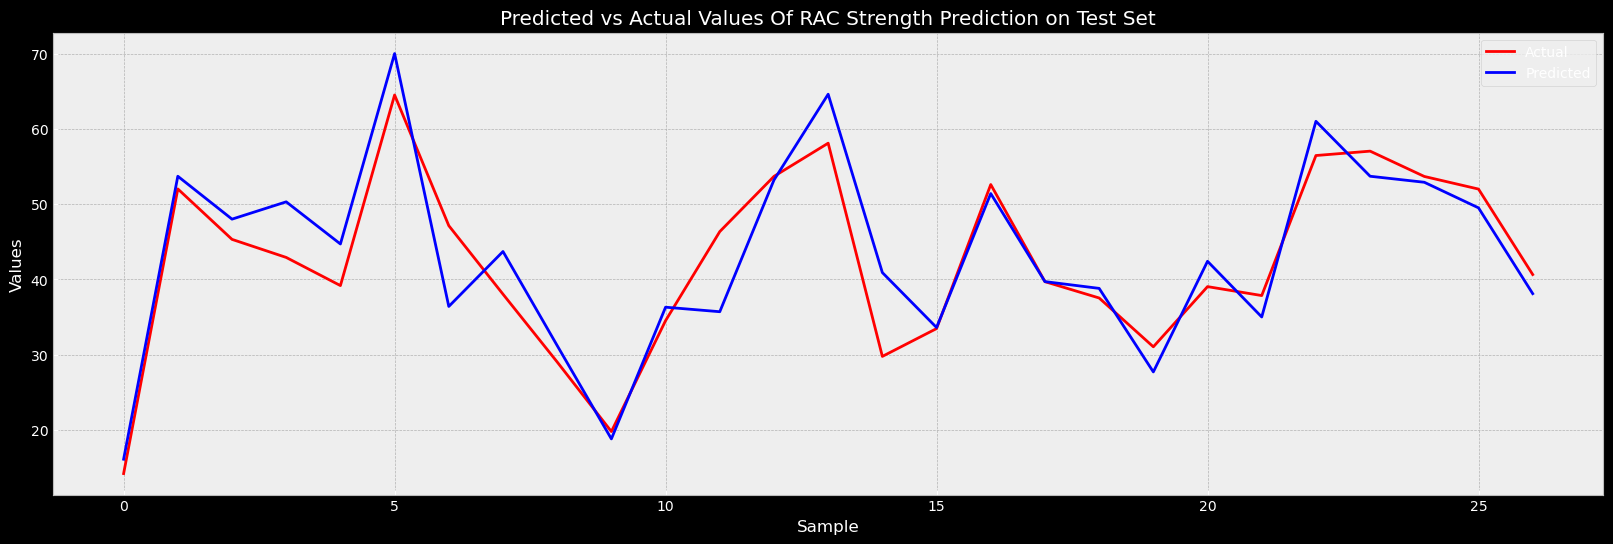

In [159]:
detailed_predicted = model_opt_det.predict(X_test_det)
plt.figure(figsize=(20, 6))
plt.plot(detailed_predicted, color='red', label='Actual')
plt.plot(Y_test_det, color='blue', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values Of RAC Strength Prediction on Test Set')
plt.legend()
plt.show()

In [160]:
yhat =model_opt_cs.predict(X_test_cs)
r_squared = r2_score(Y_test_cs, yhat)
r_squared

0.9268063703799776

In [161]:
cs_predicted = model_opt_cs.predict(X_test_cs)

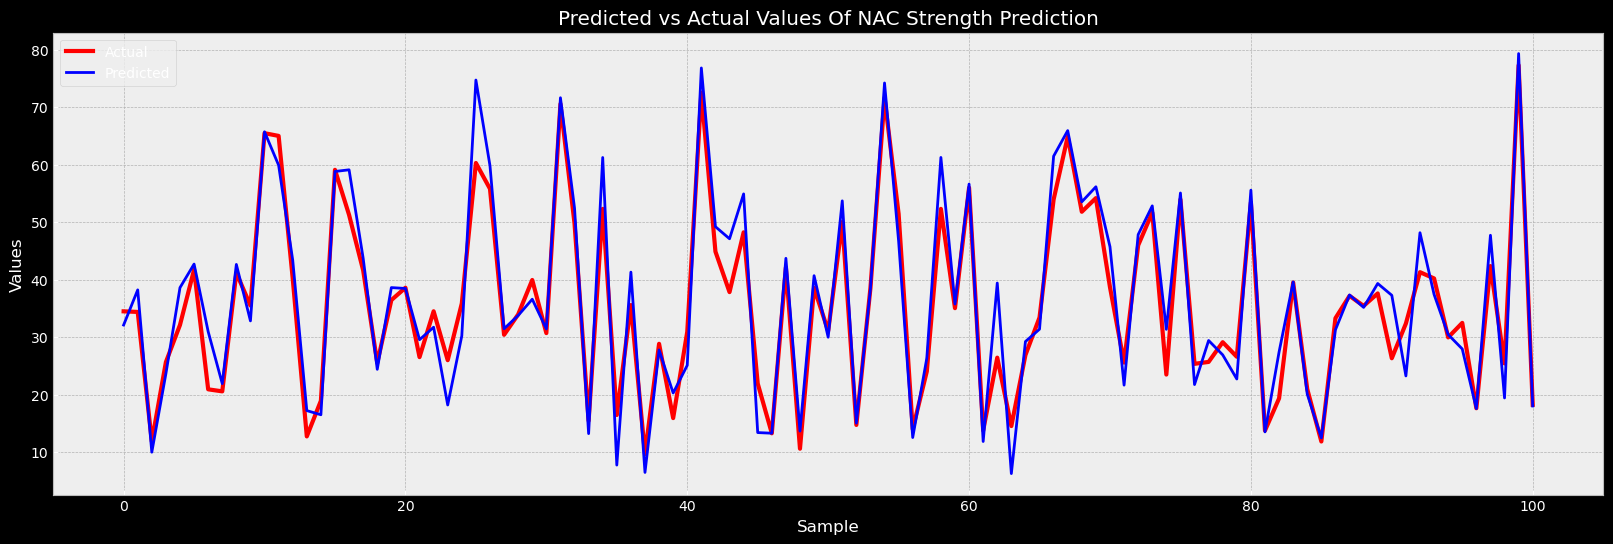

In [162]:

plt.figure(figsize=(20, 6))
plt.plot(cs_predicted, color='red', label='Actual',linewidth=3)
plt.plot(Y_test_cs, color='blue', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values Of NAC Strength Prediction')
plt.legend()
plt.show()

In [163]:
yhat =model_opt_c.predict(X_test_c)
r_squared = r2_score(Y_test_c, yhat)
r_squared

0.9120696230376829

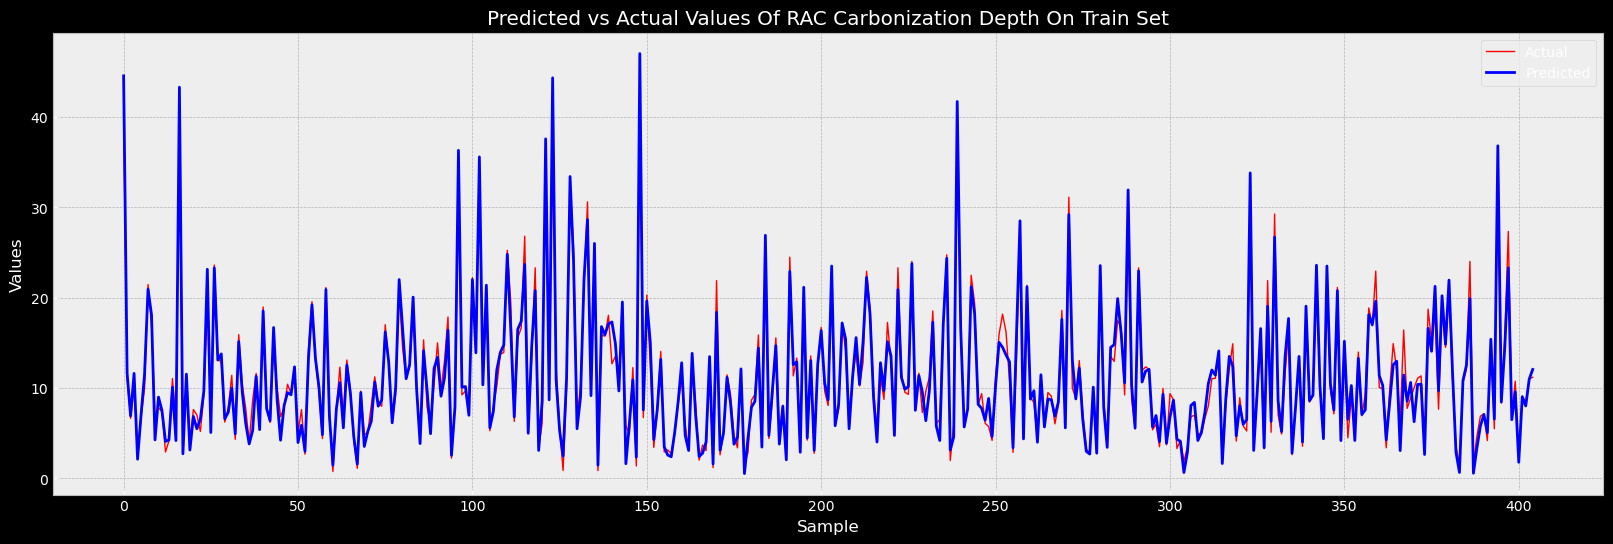

In [164]:
c_predicted = model_opt_c.predict(X_train_c)

plt.figure(figsize=(20, 6))
plt.plot(c_predicted, color='red', label='Actual',linewidth=1)
plt.plot(Y_train_c, color='blue', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values Of RAC Carbonization Depth On Train Set')
plt.legend()
plt.show()

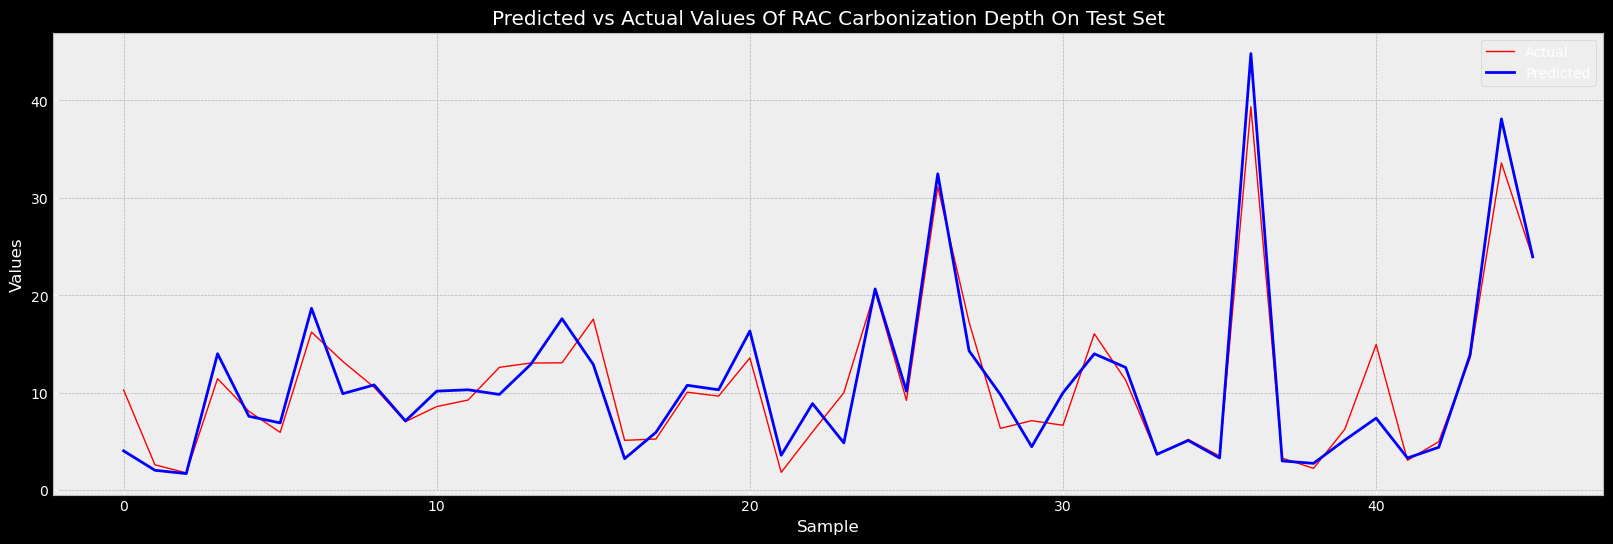

In [165]:
c_predicted = model_opt_c.predict(X_test_c)

plt.figure(figsize=(20, 6))
plt.plot(c_predicted, color='red', label='Actual',linewidth=1)
plt.plot(Y_test_c, color='blue', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values Of RAC Carbonization Depth On Test Set')
plt.legend()
plt.show()

0.9981335371702095


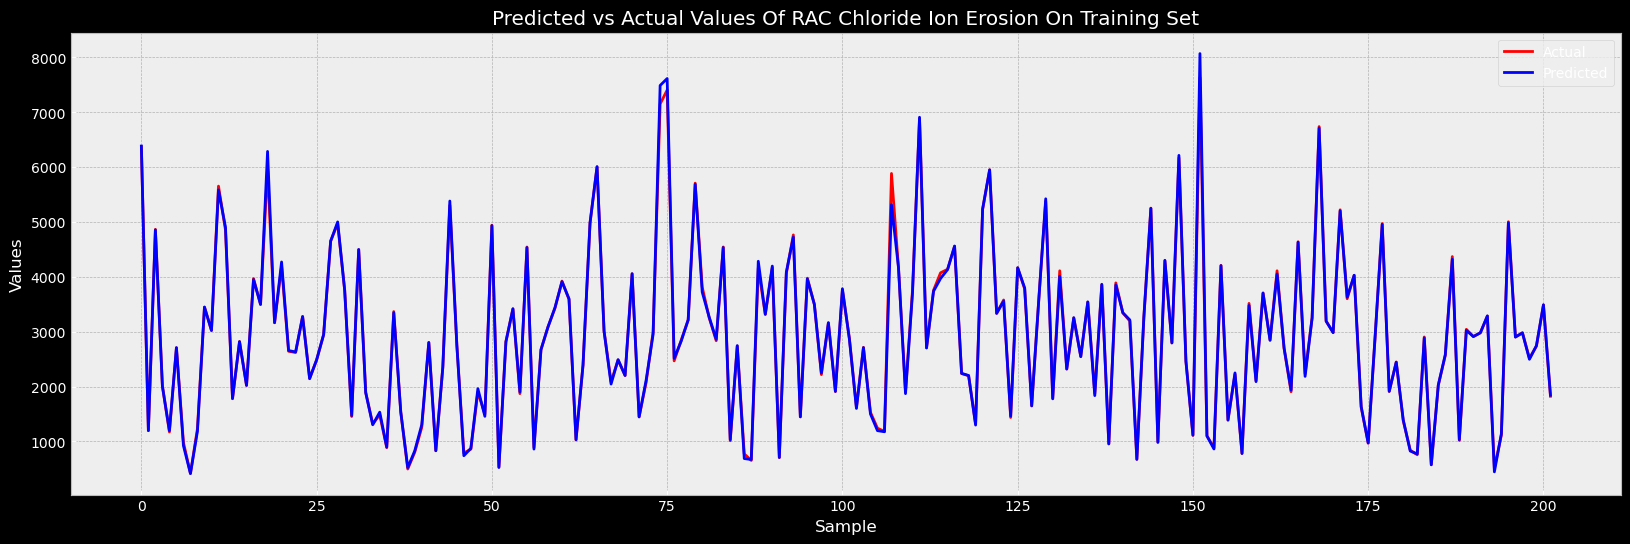

In [166]:
yhat =model_opt_cl.predict(X_train_cl)
r_squared = r2_score(Y_train_cl, yhat)
print(r_squared)
cl_predicted = model_opt_cl.predict(X_train_cl)

plt.figure(figsize=(20, 6))
plt.plot(cl_predicted, color='red', label='Actual')
plt.plot(Y_train_cl, color='blue', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values Of RAC Chloride Ion Erosion On Training Set')
plt.legend()
plt.show()

In [167]:
yhat =model_opt_cl.predict(X_test_cl)
r_squared = r2_score(Y_test_cl, yhat)
r_squared

0.9148813034026573

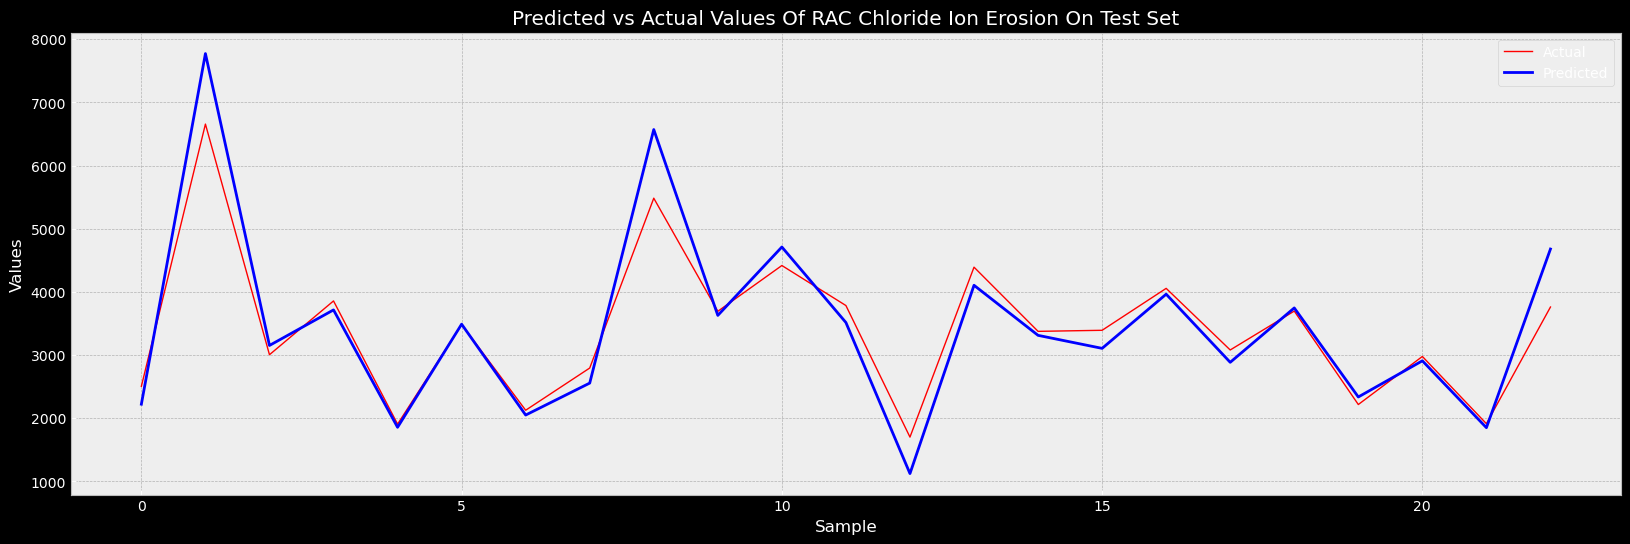

In [168]:
cl_predicted = model_opt_cl.predict(X_test_cl)

plt.figure(figsize=(20, 6))
plt.plot(cl_predicted, color='red', label='Actual',linewidth=1)
plt.plot(Y_test_cl, color='blue', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values Of RAC Chloride Ion Erosion On Test Set')
plt.legend()
plt.show()

0.9765716437323141


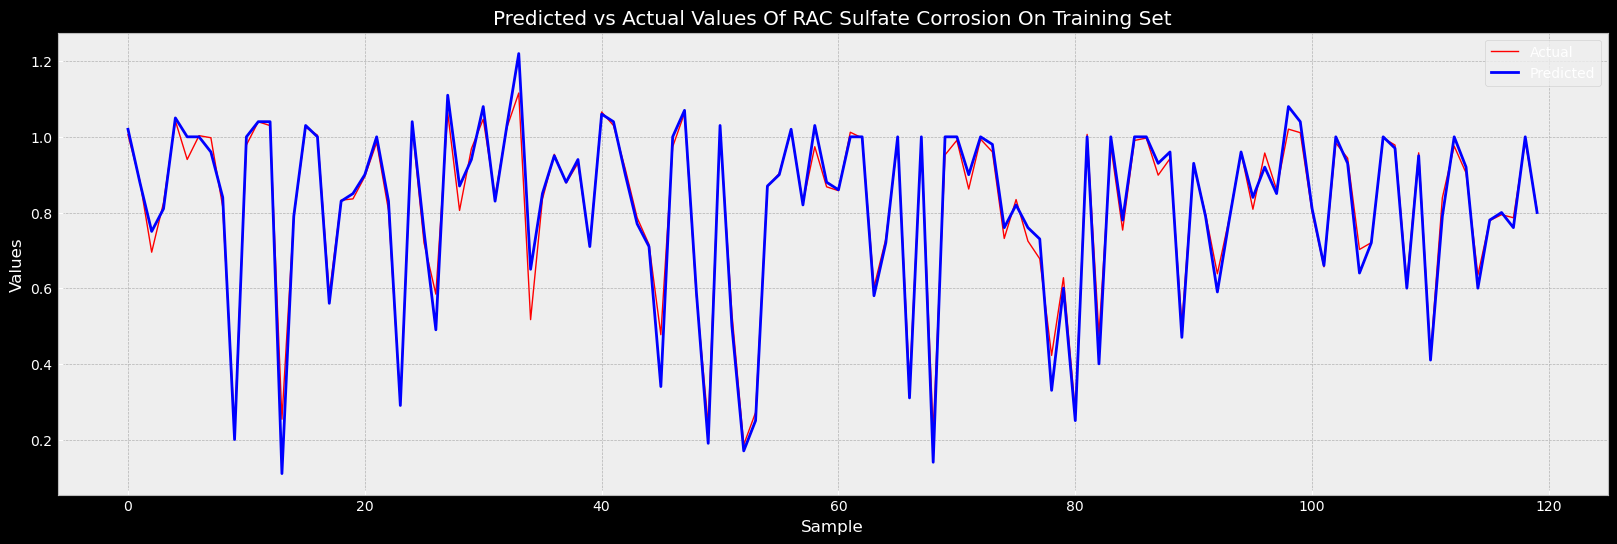

In [169]:
yhat =model_opt_sf.predict(X_train_sf)
r_squared = r2_score(Y_train_sf, yhat)
print(r_squared)
sf_predicted = model_opt_sf.predict(X_train_sf)

plt.figure(figsize=(20, 6))
plt.plot(sf_predicted, color='red', label='Actual',linewidth=1)
plt.plot(Y_train_sf, color='blue', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values Of RAC Sulfate Corrosion On Training Set')
plt.legend()
plt.show()

In [170]:
yhat =model_opt_sf.predict(X_test_sf)
r_squared = r2_score(Y_test_sf, yhat)
r_squared

0.9170531556452696

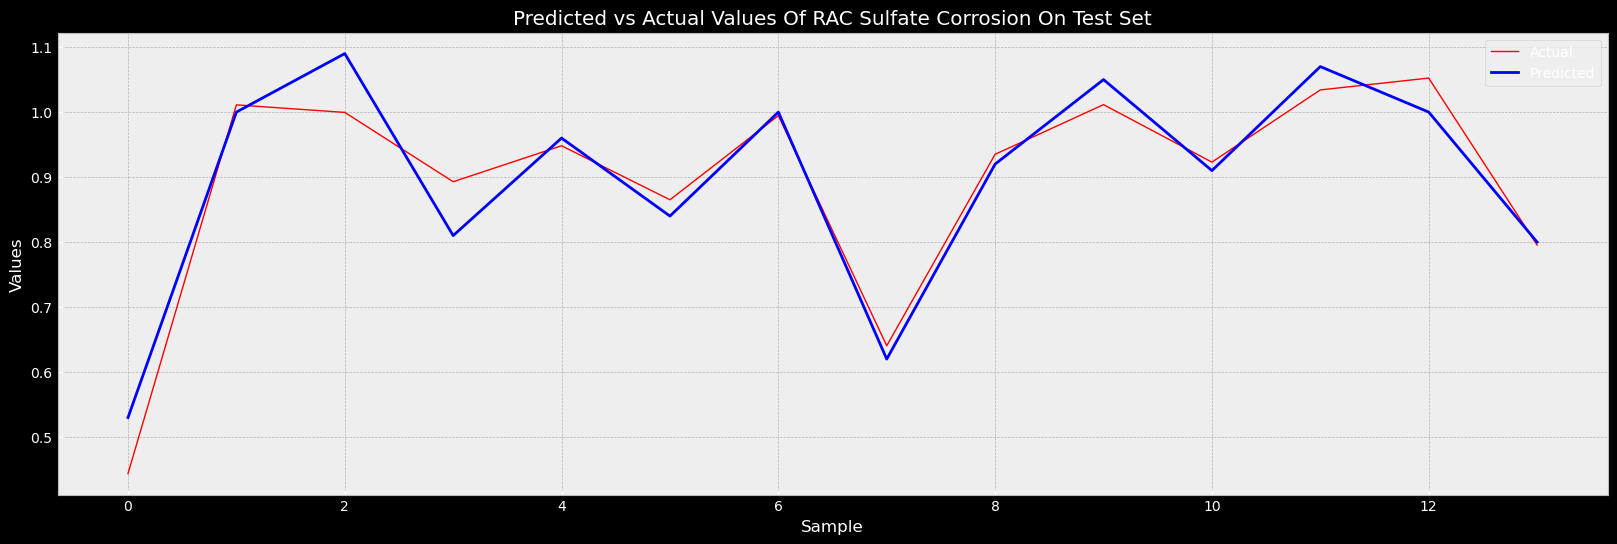

In [171]:
sf_predicted = model_opt_sf.predict(X_test_sf)

plt.figure(figsize=(20, 6))
plt.plot(sf_predicted, color='red', label='Actual',linewidth=1)
plt.plot(Y_test_sf, color='blue', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Values')
plt.title('Predicted vs Actual Values Of RAC Sulfate Corrosion On Test Set')
plt.legend()
plt.show()

### Exporting Trained Models For Future Use Of Predictions

In [172]:
import joblib
transform = joblib.load('transform_X_detailed.pkl')
mode = joblib.load('RAC Strength Prediction3.pkl')
test = [[141.5,283,283,566,0,1,20,2300,10]]
test1 = transform.transform(test)
result=mode.predict(test1)
print(result)

[42.732243]


In [173]:
detailed_rac.shape

(263, 10)

In [174]:
X_test_det.shape

(27, 9)

In [175]:
X_train_det.shape

(236, 9)

In [176]:
import joblib

In [177]:

joblib.dump(model_opt_det, 'RAC Strength Predictionfinal.pkl')
#joblib.dump(model_opt_cs,'NAC Strength Prediction.pkl')
#joblib.dump(model_opt_cl,'RAC Chloride Ion Prediction.pkl')
##joblib.dump(model_opt_c,'RAC Carbonization Prediction.pkl')
#joblib.dump(model_opt_sf,'RAC Sulfate Corrosion Prediction.pkl')


['RAC Strength Predictionfinal.pkl']

In [178]:
joblib.dump(transform_X_detailed, 'transform_X_detailed.pkl')
joblib.dump(transform_X_cs,'transform_X_cs.pkl')
joblib.dump(transform_X_chloride,'transform_X_chloride.pkl')
joblib.dump(transform_X_carbonization,'transform_X_carbonization.pkl')
joblib.dump(transform_X_sulfate,'transform_X_sulfate.pkl')

['transform_X_sulfate.pkl']

In [179]:
import shap

In [180]:
explainer = shap.Explainer(model_opt_det)
shap_values = explainer(X_train_det)

# set a display version of the data to use for plotting (has string values)
shap_values.display_data = shap.datasets.adult(display=True)[0].values

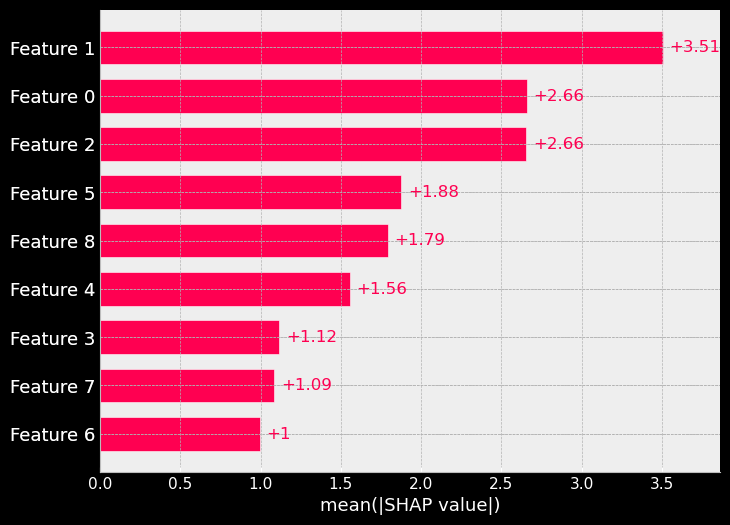

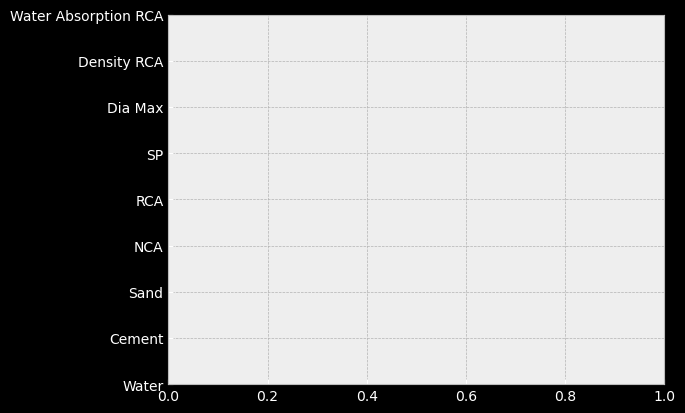

In [181]:
feature_names = ['Water','Cement','Sand','NCA','RCA','SP','Dia Max','Density RCA','Water Absorption RCA']
shap.plots.bar(shap_values)
plt.yticks(range(len(feature_names)), feature_names)

plt.show()

In [182]:
explainer = shap.Explainer(model_opt_sf)
shap_values = explainer(X_train_sf)

# set a display version of the data to use for plotting (has string values)
shap_values.display_data = shap.datasets.adult(display=True)

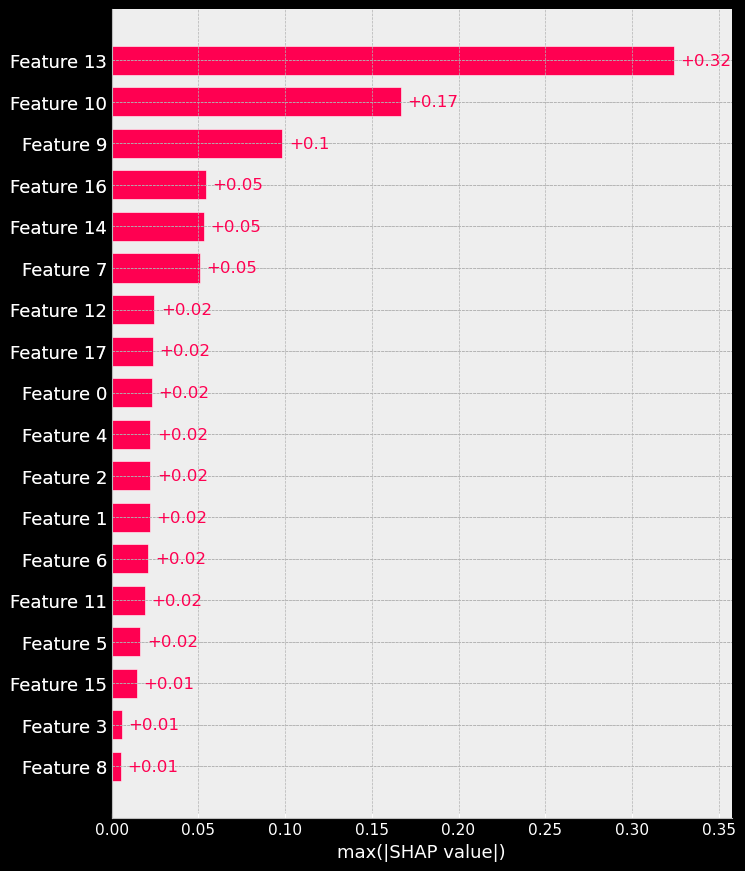

In [183]:
shap.plots.bar(shap_values.abs.max(0),max_display=20)

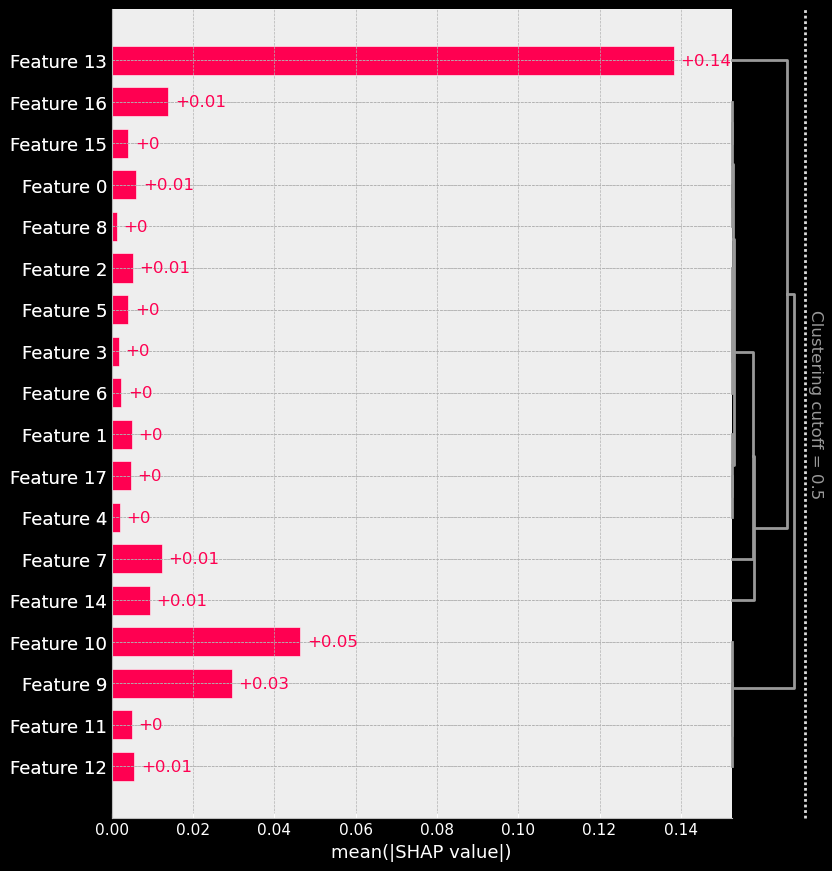

In [184]:
clustering = shap.utils.hclust(X_train_sf, Y_train_sf)
shap.plots.bar(shap_values, clustering=clustering,max_display=20)

In [185]:
shap.plots.scatter(
    shap_values, ylabel="SHAP value\n(higher means more likely to renew)"
)

TypeError: object of type 'NoneType' has no len()

In [ ]:
explainer1 = shap.Explainer(model_opt_c)
shap_values1 = explainer1(X_train_c)

# set a display version of the data to use for plotting (has string values)
shap_values1.display_data = shap.datasets.adult(display=True)[0].values

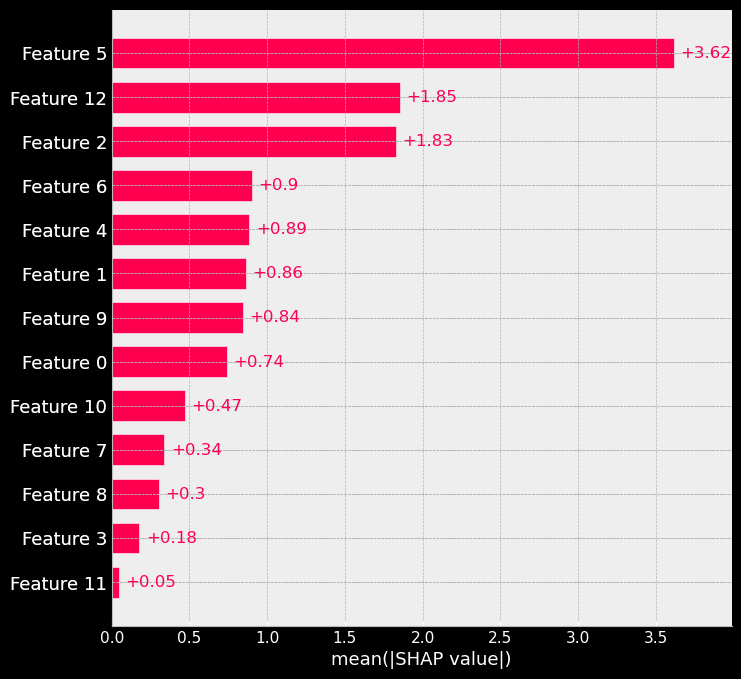

In [ ]:
shap.plots.bar(shap_values1,max_display=20)

In [ ]:
explainer2 = shap.Explainer(model_opt_cs)
shap_values2 = explainer2(X_train_cs)

# set a display version of the data to use for plotting (has string values)
shap_values2.display_data = shap.datasets.adult(display=True)[0].values

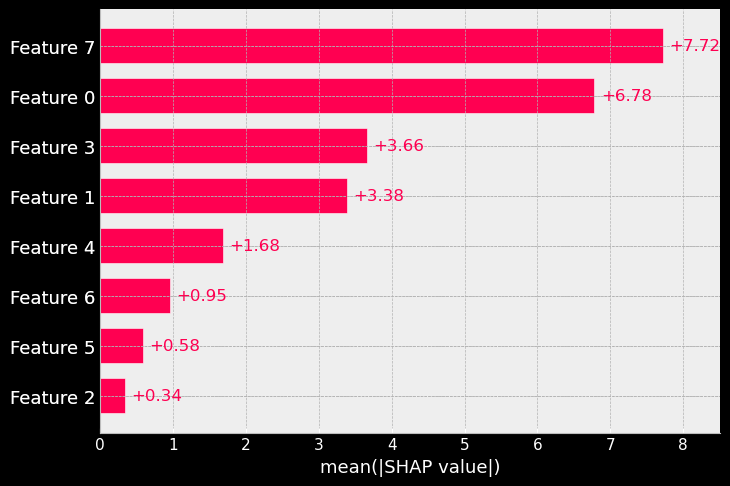

In [ ]:
shap.plots.bar(shap_values2)

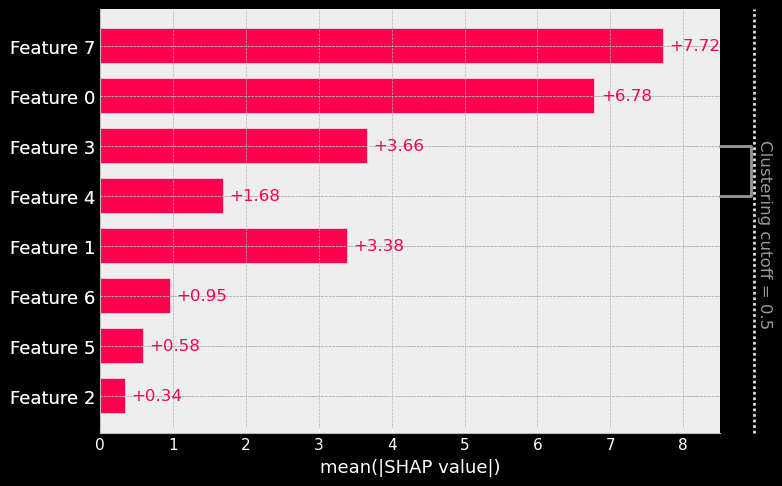

In [ ]:
clustering = shap.utils.hclust(X_train_cs, Y_train_cs)
shap.plots.bar(shap_values2, clustering=clustering,max_display=20)

In [ ]:
explainer = shap.Explainer(model_opt_cl)
shap_values = explainer(X_train_cl)

# set a display version of the data to use for plotting (has string values)
shap_values.display_data = shap.datasets.adult(display=True)[0].values

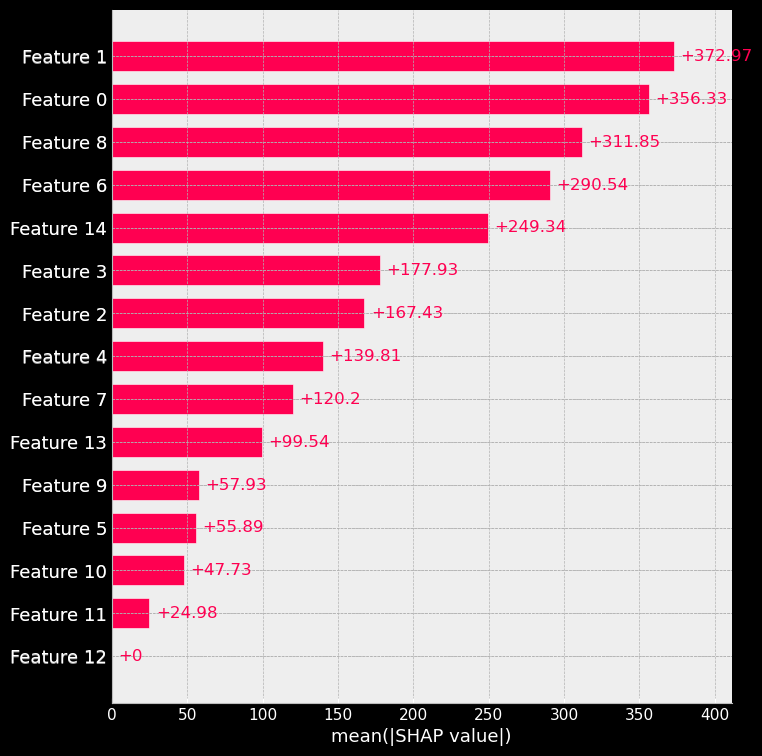

In [ ]:
shap.plots.bar(shap_values,max_display=20)

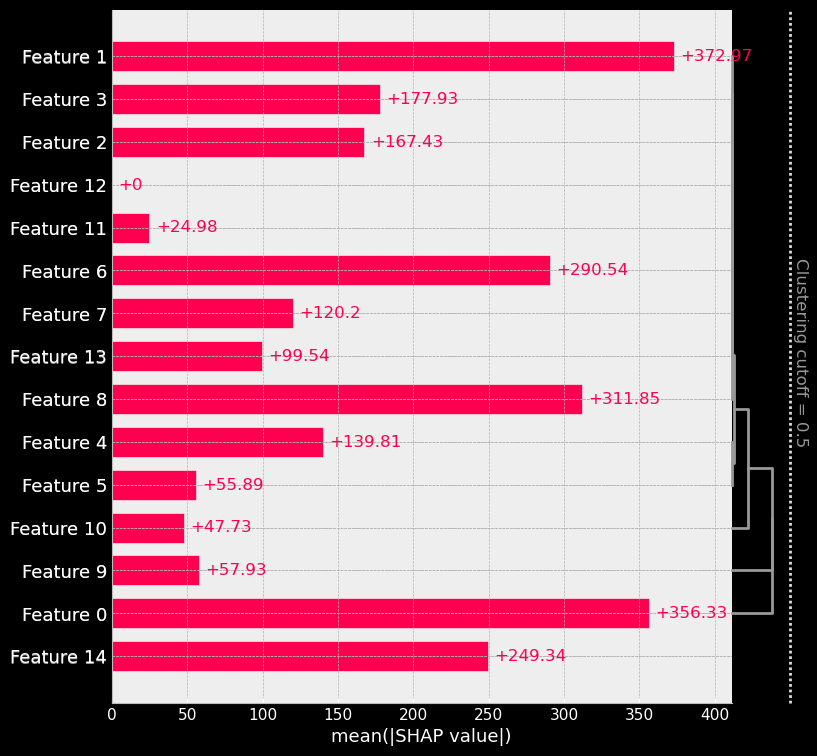

In [ ]:
clustering = shap.utils.hclust(X_train_cl, Y_train_cl)
shap.plots.bar(shap_values, clustering=clustering,max_display=20)